# Predicting the probabilities of room booking cancellations for effective hotel management.

## Executive Summary

We will be exploring the public dataset, Hotel Bookings drawn from Kaggle. With the help of Python libraries NumPy, Pandas, Matplotlib and Seaborn, this presentation covers the Exploratory Data Analysis (EDA) and fits Machine Learning techniques such as  Logistic Regression Machine Model.

The acquired dataset contains key information such as the types of hotel guests, arrival information, duration of stays, cancellation rates, allocation of room types and lead time of the two hotels namely Resort hotel and City hotel. These two hotels are based in Portugal. Resort hotel is located at Algarve and City hotel is located at Lisbon. Dataset entails the information of hotel guests who have booked their stays from July 2015 to Aug 2017. 

We will take a deep dive into the dataset to explore the predictive model(Logistic Regression Model) for hotels to adopt to reduce the numbers of unanticipated room booking cancellations and to better plan their limited resources.This in turn will maximise the ADR, enabling profit maximisation for the businesses. 



In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
sns.set (rc={'figure.figsize': (10,6)})
from scipy import stats

%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn import model_selection as ms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

## Objective

The main objective of this presentation is to aid hotel operators to better manage their resources by predicting the cancellation rates of their reservations. With this prediction information, the operators should be able to maximise the revenues generated by each rooms and to develop on terms and conditions that might prevent unnecessary cancellations.

We will be building a Logistic Regression model to predict the probability of cancellation rate which is a categorical dependent variable. In our following dataset, cancellation is categorised as a binary variable with 0(not cancelled) and 1(cancelled) booking.

## Problem Statement

Predict the probabilities of cancellation to allow for hotel management to plan for  future booking strategies.

## Data Investigation 

We get to understand the data structure and the following initial questions are formed before the deep dive. 
1) How in advance do the hotel guests book their rooms?
2) Who forms the majority of the hotel guest list? 
3) Out of the cancellations, how many guests cancel last minute? 
4) Does cancellation occur amongst guests who have paid advances? 

We will load the necessary Python libraries for our analysis and set some parameters:

In [2]:
Hotel_bookings = pd.read_csv("/Users/sbuvana/Desktop/Labs/data/hotel_bookings.csv")
Hotel_bookings.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [3]:
Hotel_bookings = pd.read_csv("/Users/sbuvana/Desktop/Labs/data/hotel_bookings.csv")
Hotel_bookings.tail(10)



,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119380,City Hotel,0,44,2017,August,35,31,1,3,2,...,No Deposit,9.0,NaN,0,Transient,140.75,0,1,Check-Out,2017-09-04
119381,City Hotel,0,188,2017,August,35,31,2,3,2,...,No Deposit,14.0,NaN,0,Transient,99.00,0,0,Check-Out,2017-09-05
119382,City Hotel,0,135,2017,August,35,30,2,4,3,...,No Deposit,7.0,NaN,0,Transient,209.00,0,0,Check-Out,2017-09-05
119383,City Hotel,0,164,2017,August,35,31,2,4,2,...,No Deposit,42.0,NaN,0,Transient,87.60,0,0,Check-Out,2017-09-06
119384,City Hotel,0,21,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,2,Check-Out,2017-09-06
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [4]:
Hotel_bookings.sort_index()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [5]:
index = Hotel_bookings.index

In [6]:
index

RangeIndex(start=0, stop=119390, step=1)

In [7]:

print ("rows and columns:",Hotel_bookings.shape)

rows and columns: (119390, 32)


In [8]:
("columns:",Hotel_bookings.columns)

('columns:',
 Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
        'arrival_date_month', 'arrival_date_week_number',
        'arrival_date_day_of_month', 'stays_in_weekend_nights',
        'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
        'country', 'market_segment', 'distribution_channel',
        'is_repeated_guest', 'previous_cancellations',
        'previous_bookings_not_canceled', 'reserved_room_type',
        'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
        'company', 'days_in_waiting_list', 'customer_type', 'adr',
        'required_car_parking_spaces', 'total_of_special_requests',
        'reservation_status', 'reservation_status_date'],
       dtype='object'))

In [9]:
Hotel_bookings.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [10]:
Hotel_bookings['country']= Hotel_bookings['country'].astype(str)

In [11]:
Hotel_bookings.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [12]:
#null values in columns
Hotel_bookings.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         


From the above, we learn that we have distinct columns with missing values namely the booking agent and the company. This dataset contains 119390 rows. Out of which 112593 entries are missing for the column company. Around 13% of the values under booking agent is missing. We will proceed to drop and omit these columns for analysis. We note that 488 data points are missing for countries these guests come from. We will impute unknown for these observations to proceed with EDA.

In [13]:
Hotel_bookings.drop(['company', 'agent'], axis = 1, inplace=True)

In [14]:
Hotel_bookings.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [15]:
Hotel_bookings.country.fillna("Unknown", inplace=True)

In [16]:
Hotel_bookings.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [17]:
Hotel_bookings.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [18]:
def get_var_category(series):
    unique_count = series.nunique(dropna=False)
    total_count = len(series)
    if pd.api.types.is_numeric_dtype(series):
        return 'Numerical'
    elif pd.api.types.is_datetime64_dtype(series):
        return 'Date'
    elif unique_count==total_count:
        return 'Text (Unique)'
    else:
        return 'Categorical'

def print_categories(df):
    for column_name in Hotel_bookings.columns:
        print(column_name, ": ", get_var_category(Hotel_bookings[column_name]))

In [19]:
print_categories('hotel')

hotel :  Categorical
is_canceled :  Numerical
lead_time :  Numerical
arrival_date_year :  Numerical
arrival_date_month :  Categorical
arrival_date_week_number :  Numerical
arrival_date_day_of_month :  Numerical
stays_in_weekend_nights :  Numerical
stays_in_week_nights :  Numerical
adults :  Numerical
children :  Numerical
babies :  Numerical
meal :  Categorical
country :  Categorical
market_segment :  Categorical
distribution_channel :  Categorical
is_repeated_guest :  Numerical
previous_cancellations :  Numerical
previous_bookings_not_canceled :  Numerical
reserved_room_type :  Categorical
assigned_room_type :  Categorical
booking_changes :  Numerical
deposit_type :  Categorical
days_in_waiting_list :  Numerical
customer_type :  Categorical
adr :  Numerical
required_car_parking_spaces :  Numerical
total_of_special_requests :  Numerical
reservation_status :  Categorical
reservation_status_date :  Categorical


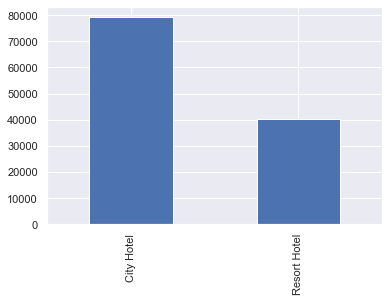

In [20]:
Hotel_bookings['hotel'] .value_counts().plot(kind='bar');

We can note the respective number of bookings of these two hotels. We can infer that around 66.5% of the total bookings were made for City Hotel and remaining 33.5% booked with Resort Hotel in these 3 years of 2015 to 2017.

In [21]:
Hotel_bookings[Hotel_bookings['hotel'] == 'Resort Hotel']

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,Resort Hotel,0,212,2017,August,35,31,2,8,2,...,A,1,No Deposit,0,Transient,89.75,0,0,Check-Out,2017-09-10
40056,Resort Hotel,0,169,2017,August,35,30,2,9,2,...,E,0,No Deposit,0,Transient-Party,202.27,0,1,Check-Out,2017-09-10
40057,Resort Hotel,0,204,2017,August,35,29,4,10,2,...,E,0,No Deposit,0,Transient,153.57,0,3,Check-Out,2017-09-12
40058,Resort Hotel,0,211,2017,August,35,31,4,10,2,...,D,0,No Deposit,0,Contract,112.80,0,1,Check-Out,2017-09-14


In [22]:
Hotel_bookings[Hotel_bookings['hotel'] == 'City Hotel']

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40060,City Hotel,0,6,2015,July,27,1,0,2,1,...,A,0,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-03
40061,City Hotel,1,88,2015,July,27,1,0,4,2,...,A,0,No Deposit,0,Transient,76.50,0,1,Canceled,2015-07-01
40062,City Hotel,1,65,2015,July,27,1,0,4,1,...,A,0,No Deposit,0,Transient,68.00,0,1,Canceled,2015-04-30
40063,City Hotel,1,92,2015,July,27,1,2,4,2,...,A,0,No Deposit,0,Transient,76.50,0,2,Canceled,2015-06-23
40064,City Hotel,1,100,2015,July,27,2,0,2,2,...,A,0,No Deposit,0,Transient,76.50,0,1,Canceled,2015-04-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [23]:
Hotel_bookings[Hotel_bookings['reservation_status'] == 'Canceled']

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,A,0,No Deposit,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,D,0,No Deposit,0,Transient,105.5,0,0,Canceled,2015-04-22
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,...,E,0,No Deposit,0,Transient,123.0,0,0,Canceled,2015-06-23
27,Resort Hotel,1,60,2015,July,27,1,2,5,2,...,E,0,No Deposit,0,Transient,107.0,0,2,Canceled,2015-05-11
32,Resort Hotel,1,96,2015,July,27,1,2,8,2,...,E,0,No Deposit,0,Transient,108.3,0,2,Canceled,2015-05-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107997,City Hotel,1,13,2017,May,22,29,1,2,1,...,A,0,No Deposit,0,Transient,95.0,0,0,Canceled,2017-05-17
108000,City Hotel,1,13,2017,May,22,29,1,2,1,...,A,0,No Deposit,0,Transient,95.0,0,0,Canceled,2017-05-17
110280,City Hotel,1,132,2017,April,17,25,0,0,0,...,K,1,No Deposit,0,Transient,0.0,0,3,Canceled,2017-04-25
111355,City Hotel,1,4,2017,June,23,5,1,0,1,...,A,0,No Deposit,0,Transient,65.0,0,0,Canceled,2017-06-05


In [24]:
Hotel_bookings[Hotel_bookings['is_canceled'] == 1]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,A,0,No Deposit,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,D,0,No Deposit,0,Transient,105.5,0,0,Canceled,2015-04-22
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,...,E,0,No Deposit,0,Transient,123.0,0,0,Canceled,2015-06-23
27,Resort Hotel,1,60,2015,July,27,1,2,5,2,...,E,0,No Deposit,0,Transient,107.0,0,2,Canceled,2015-05-11
32,Resort Hotel,1,96,2015,July,27,1,2,8,2,...,E,0,No Deposit,0,Transient,108.3,0,2,Canceled,2015-05-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110280,City Hotel,1,132,2017,April,17,25,0,0,0,...,K,1,No Deposit,0,Transient,0.0,0,3,Canceled,2017-04-25
111355,City Hotel,1,4,2017,June,23,5,1,0,1,...,A,0,No Deposit,0,Transient,65.0,0,0,Canceled,2017-06-05
111924,City Hotel,1,7,2017,May,22,31,0,1,1,...,A,0,No Deposit,0,Transient,65.0,0,0,Canceled,2017-05-31
111925,City Hotel,1,6,2017,July,29,17,1,0,1,...,D,0,No Deposit,0,Transient,65.0,0,0,No-Show,2017-07-17


The variable of reservation status seems to contain 43017 data points corresponding to cancelled bookings. We need to explore futher to deduce if we need to include this feature for any meaningful data analysis.

In [25]:
Hotel_bookings.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037622,-0.020915,-0.124410,0.086042,-0.073548,0.000149,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054624,-0.013192,0.010341,-0.119822,0.029218,0.030872,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,-0.030131,0.035501,-0.020904,0.005508,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045793,0.018483,-0.087239,-0.012775,-0.042715,0.063281,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030447,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.008283,0.230641,0.014785,0.122884
children,0.005048,-0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,-0.032859,-0.024730,-0.021072,0.048949,-0.033273,0.324854,0.056253,0.081745
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,-0.010621,0.029186,0.037383,0.097889


## EDA 

Explore dataset. General overview of the feature variables to predict `is_canceled'.

In [26]:
Hotel_bookings['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
NIC        1
HND        1
FJI        1
AIA        1
VGB        1
Name: country, Length: 178, dtype: int64

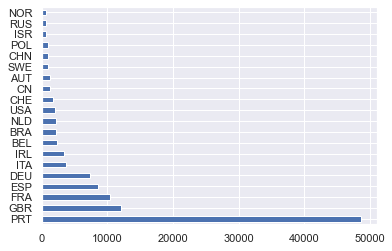

In [27]:
Hotel_bookings['country'].value_counts()[:20].plot(kind='barh');

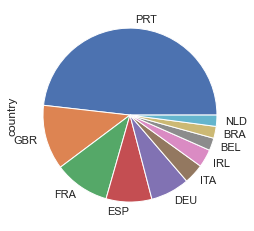

In [28]:
Hotel_bookings['country'].value_counts()[:10].plot(kind='pie');

Majority of hotel guests are locals (Portugese). The top groups are European travellers.

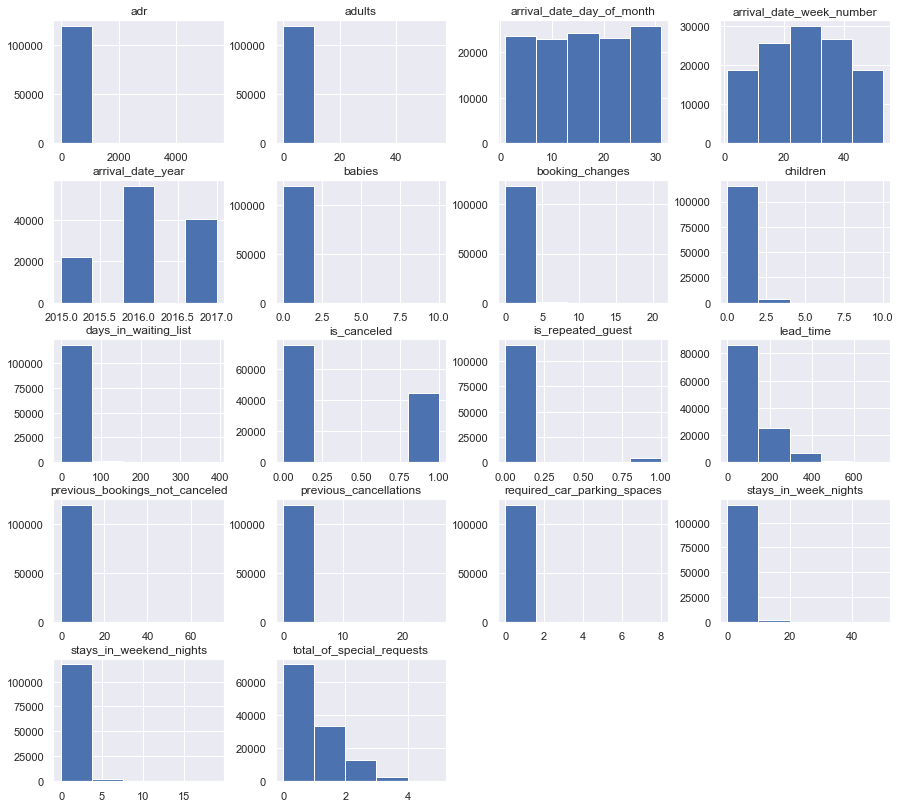

In [29]:
Hotel_bookings.hist(bins=5,figsize=(15, 14))
plt.show()

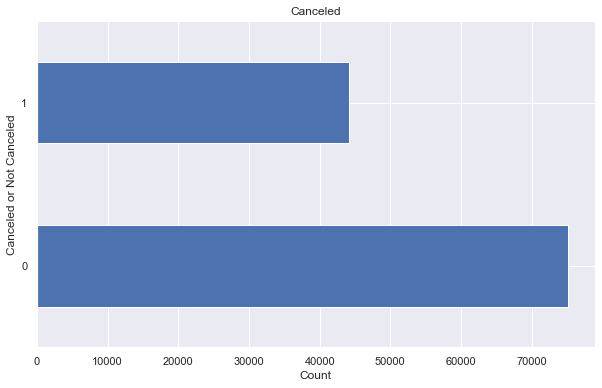

In [30]:
plt.figure(figsize=(10,6))
Hotel_bookings['is_canceled'].value_counts().plot(kind='barh')

plt.title('Canceled')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Canceled or Not Canceled', fontsize=12);

Out of the total number of bookings,44224 bookings have been canceled over these 3 years.

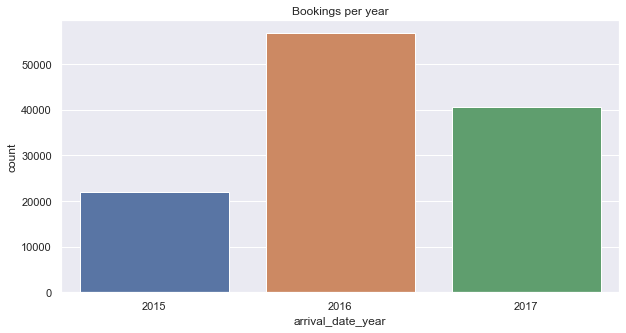

In [31]:

plt.figure(figsize=(10,5))
sns.countplot(Hotel_bookings['arrival_date_year'])
plt.xticks
plt.title('Bookings per year')

plt.show()

Most bookings for these two hotels were made for stays in 2016.

In [32]:
 cancel_by_year = pd.concat([Hotel_bookings.groupby('arrival_date_year').sum()['is_canceled'].sort_values(ascending=False),Hotel_bookings['arrival_date_year'].value_counts()], axis=1).rename(columns={'is_canceled':'num_cancellations', 'arrival_date_year': 'num_bookings'})

<Figure size 864x504 with 0 Axes>

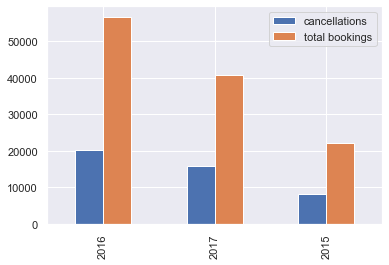

In [33]:
Cancel_year = pd.concat([Hotel_bookings.groupby('arrival_date_year').sum()['is_canceled'].sort_values(ascending=False),
    Hotel_bookings['arrival_date_year'].value_counts()
], axis=1).rename(columns={'is_canceled':'cancellations', 'arrival_date_year': 'total bookings'})
plt.figure(figsize=(12,7))
Cancel_year.plot.bar();

Rate of cancellation is pretty significant in years 2016 and 2017.

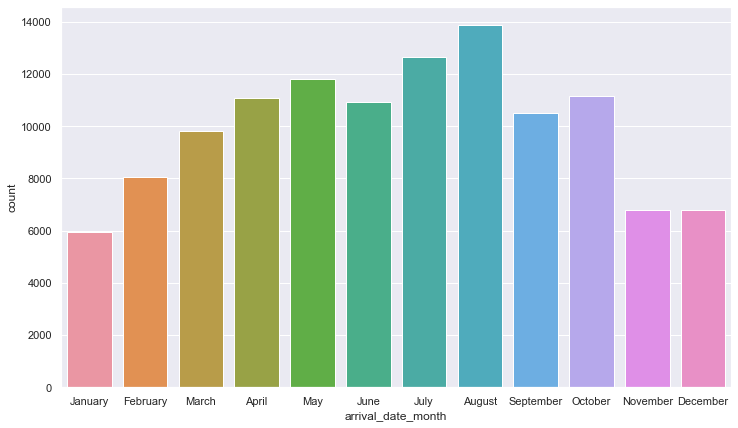

In [34]:
month_sorted = ['January','February','March','April','May','June','July','August','September','October','November','December']
plt.figure(figsize=(12,7))
sns.countplot(Hotel_bookings['arrival_date_month'], order = month_sorted)
plt.xticks

plt.show()

We can make some interesting observations from this barchart. The highest number of bookings is on months August and July. Whereas the lowest number of hotel bookings for these two hotels are made during holiday seasons of Decemeber and January.

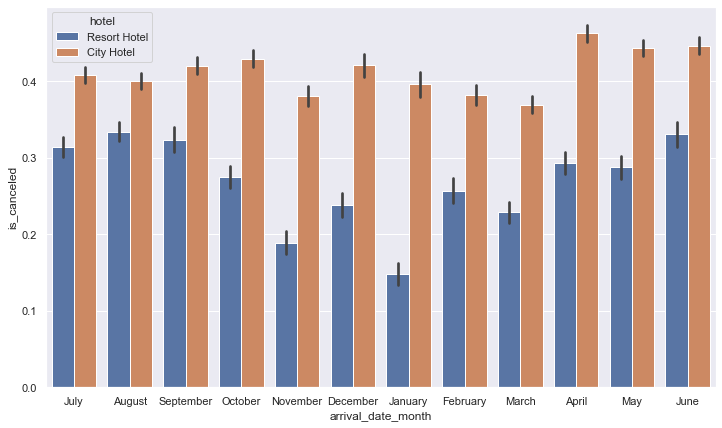

In [35]:
#Plot Arrival month vs Cancellation vs Hotel
plt.figure(figsize=(12,7))
sns.barplot(x = 'arrival_date_month', y = 'is_canceled', hue = 'hotel', data = Hotel_bookings);

In comparison to Resort Hotel, City Hotel seems to have higher rates of cancellation throughout the months.

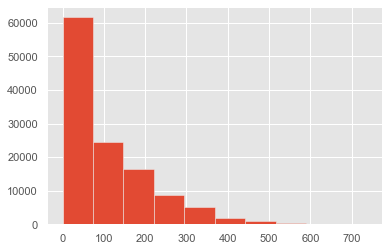

In [36]:
plt.style.use('ggplot')
plt.hist(Hotel_bookings['lead_time'], bins=10)

plt.show()

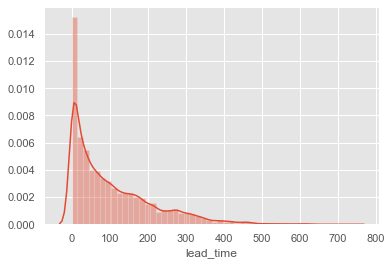

In [37]:
sns.distplot(Hotel_bookings['lead_time']);

Most bookings were confirmed with a lead time of within 100 days.

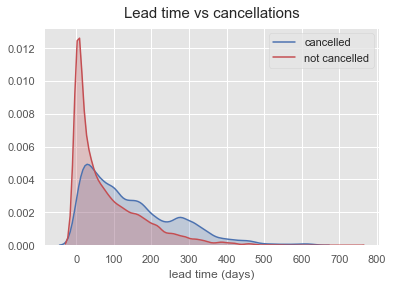

In [38]:
# Plot Lead time vs cancellations
ax1 = sns.kdeplot(Hotel_bookings[Hotel_bookings['is_canceled'] == 1].lead_time ,shade = True, label = 'cancelled' ,color ='b')
ax2 = sns.kdeplot(Hotel_bookings[Hotel_bookings['is_canceled'] == 0].lead_time , shade = True, label = 'not cancelled', color = 'r')
ax1.set_xlabel('lead time (days)')
ax1.set_title('Lead time vs cancellations',size = 15, y = 1.02)
plt.show()

In [39]:
lead_time_hotel= Hotel_bookings.groupby('hotel')['lead_time'].mean()

In [40]:
lead_time_hotel

hotel
City Hotel      109.735724
Resort Hotel     92.675686
Name: lead_time, dtype: float64

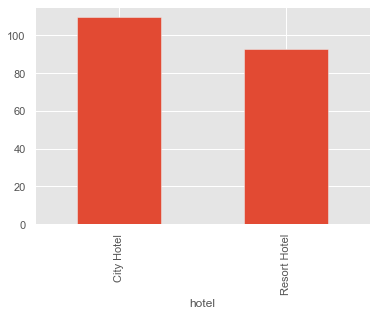

In [41]:
# The mean lead time of City Hotel and Resort Hotel
lead_time_hotel.plot(kind='bar')

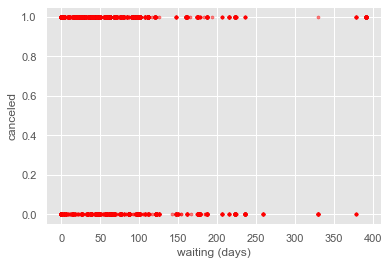

In [42]:
# Plot Waiting time vs cancellations

x = Hotel_bookings['days_in_waiting_list']
y = Hotel_bookings['is_canceled']
plt.xlabel('waiting (days)')
plt.ylabel('canceled')



plt.scatter(x, y, s=10, color='red', alpha=0.5)
plt.show()

A takeaway is that there is a demand for these two hotels. We see some of the guests waiting up to even 100 over days before cancelling.

Average Daily Rate (ADR)= 

Rooms Revenue Earned/ Number of Rooms Sold	

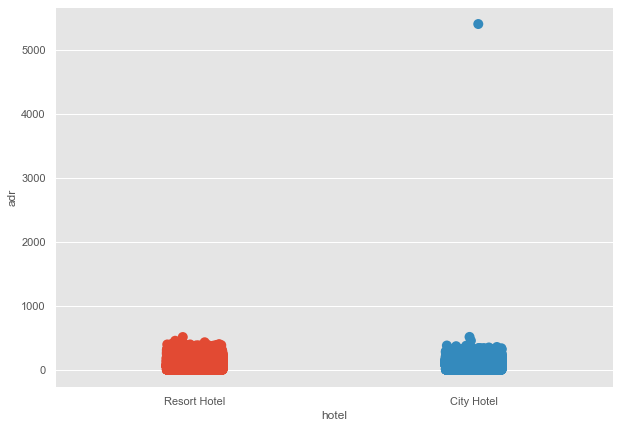

In [43]:
#Plot hotel vs ADR generated
plt.figure(figsize=(10,7))
sns.stripplot(x="hotel", y="adr",  data=Hotel_bookings, size=10,dodge=True)

ADR values seem to be uniform across both the hotels over the 3 years.However, we can spot a outlier ADR more than 5000 Euros from City Hotel.

In [44]:
Hotel_bookings ['adr'].max()

5400.0

In [45]:
Hotel_bookings ['adr'].min()

-6.38

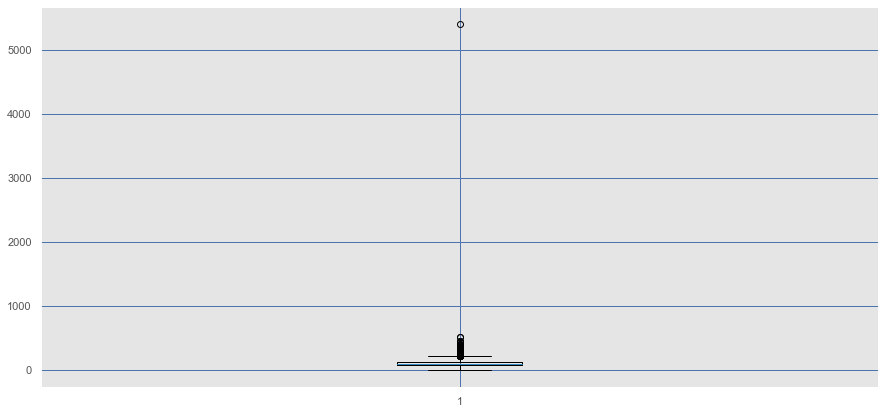

In [46]:
plt.figure(figsize=(15,7))
plt.boxplot(Hotel_bookings.adr)
plt.yscale('linear')
plt.grid(b=True, which='major', color='b', linestyle='-')
plt.grid(b=True, which='minor', color='r', linestyle='--')
plt.show()

In [47]:
#Observations with the ADR above 5000 Euros
Hotel_bookings.loc[Hotel_bookings['adr'] == 5400 ]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
48515,City Hotel,1,35,2016,March,13,25,0,1,2,...,A,1,Non Refund,0,Transient,5400.0,0,0,Canceled,2016-02-19


In [48]:
Hotel_bookings= Hotel_bookings.drop(index=48515)

In [49]:
Hotel_bookings ['adr'].max()

510.0

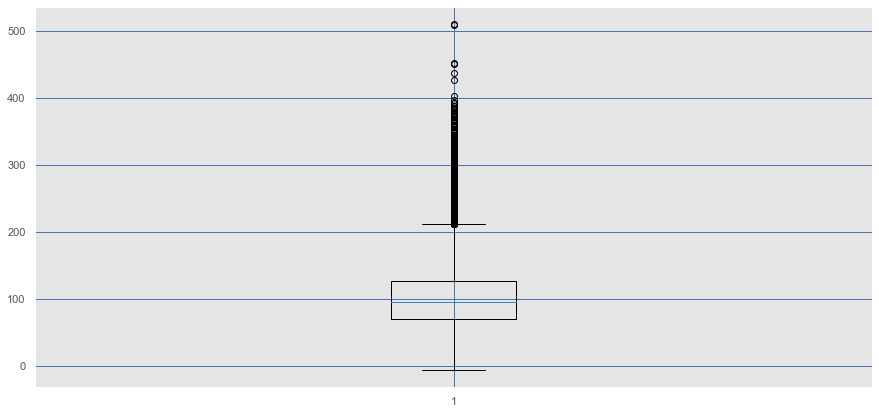

In [50]:
plt.figure(figsize=(15,7))
plt.boxplot(Hotel_bookings['adr'])
plt.yscale('linear')
plt.grid(b=True, which='major', color='b', linestyle='-')
plt.grid(b=True, which='minor', color='r', linestyle='--')
plt.show()

In [51]:
stays_in_weekend_nights = Hotel_bookings['stays_in_weekend_nights']
stays_in_weekend_nights.value_counts()

0     51997
2     33308
1     30626
4      1855
3      1259
6       153
5        79
8        60
7        19
9        11
10        7
12        5
13        3
16        3
14        2
18        1
19        1
Name: stays_in_weekend_nights, dtype: int64

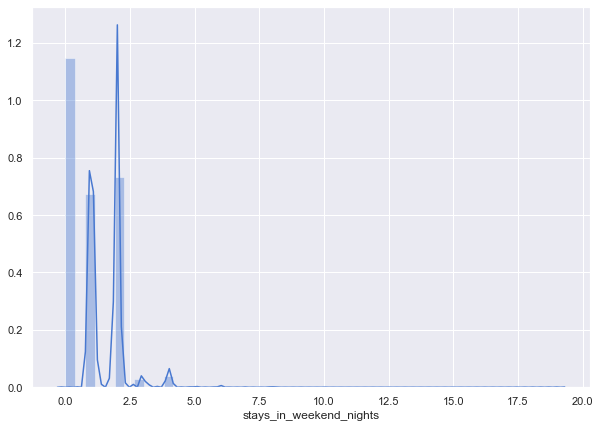

In [52]:
plt.figure(figsize=(10,7))
sns.set(color_codes=True)
sns.set_palette(sns.color_palette("muted"))
sns.distplot(Hotel_bookings["stays_in_weekend_nights"]);

<Figure size 864x504 with 0 Axes>

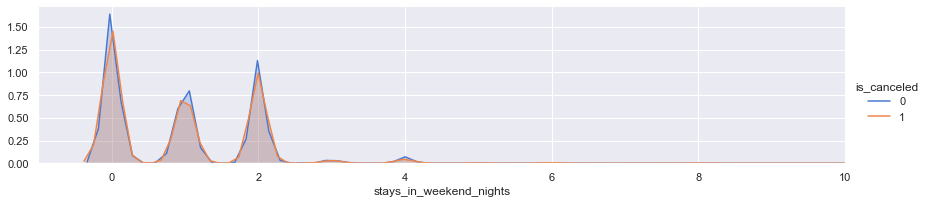

In [53]:
#Plot stay weekend nights vs cancellations
plt.figure(figsize=(12,7))
facet= sns.FacetGrid(Hotel_bookings, hue='is_canceled', aspect=4)
facet.map(sns.kdeplot,"stays_in_weekend_nights",shade=True)
facet.set(xlim=(-1,10))
facet.add_legend()
plt.show();

In [54]:
stays_in_week_nights = Hotel_bookings['stays_in_week_nights']
stays_in_week_nights.value_counts()

2     33684
1     30309
3     22258
5     11077
4      9563
0      7645
6      1499
10     1036
7      1029
8       656
9       231
15       85
11       56
19       44
12       42
20       41
14       35
13       27
16       16
21       15
22        7
18        6
25        6
30        5
17        4
24        3
40        2
42        1
26        1
32        1
33        1
34        1
35        1
41        1
50        1
Name: stays_in_week_nights, dtype: int64

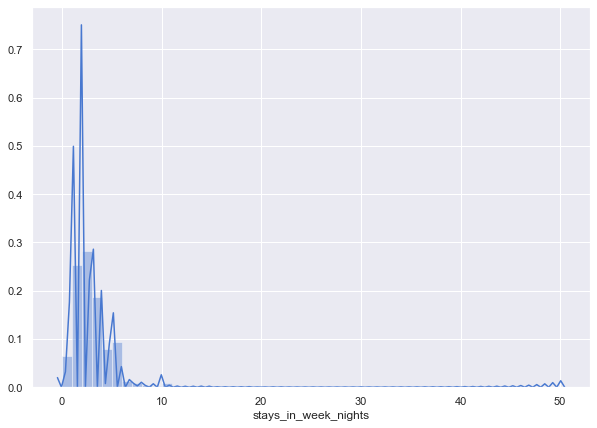

In [55]:
plt.figure(figsize=(10,7))
sns.set(color_codes=True)
sns.set_palette(sns.color_palette("muted"))
sns.distplot(Hotel_bookings["stays_in_week_nights"]);

 The most frequent value is close to 2 weeknight stay.

<Figure size 864x504 with 0 Axes>

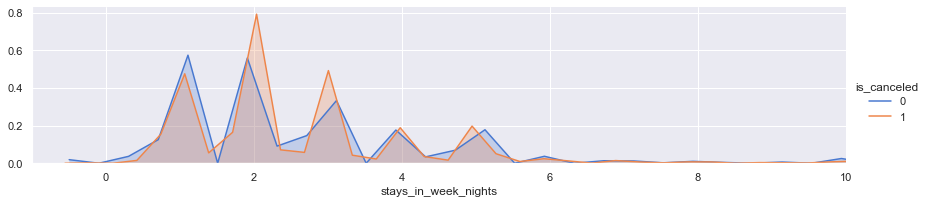

In [56]:
#Plot stay week nights vs cancellations
plt.figure(figsize=(12,7))
facet= sns.FacetGrid(Hotel_bookings, hue='is_canceled', aspect=4)
facet.map(sns.kdeplot,"stays_in_week_nights",shade=True)
facet.set(xlim=(-1,10))
facet.add_legend()
plt.show();

There are 2 major peaks of cancellations amongst those who stay 2-3 nights at hotels.

In [57]:
Hotel_bookings['all_children'] = Hotel_bookings['children'] + Hotel_bookings['babies']

In [58]:
Hotel_bookings['all_children']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
119385    0.0
119386    0.0
119387    0.0
119388    0.0
119389    0.0
Name: all_children, Length: 119389, dtype: float64

In [59]:
Hotel_bookings['all_children'].isnull().sum()

4

In [60]:
Hotel_bookings.all_children.fillna("0", inplace=True)

In [61]:
Hotel_bookings['all_children']=Hotel_bookings['all_children'].astype(int)

In [62]:
Hotel_bookings['all_children']

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: all_children, Length: 119389, dtype: int64

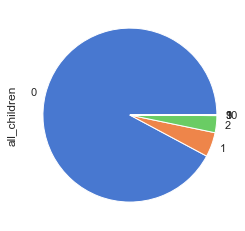

In [63]:
Hotel_bookings['all_children'].value_counts().plot(kind='pie');

Most bookings didn't have children accompanying them. Bookings either had 1 or 2 child staying in the hotels.

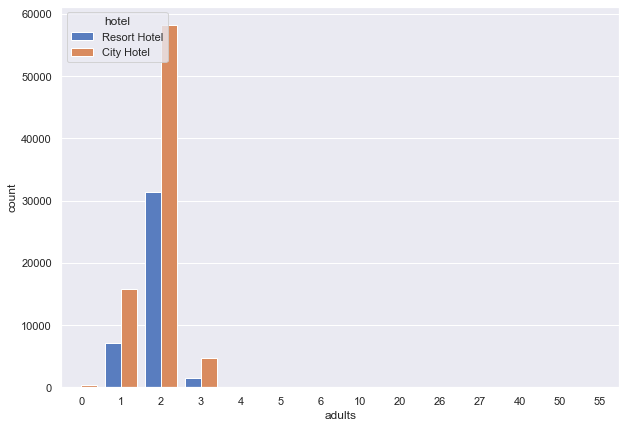

In [64]:
plt.figure(figsize=(10, 7))
sns.countplot(x='adults', hue='hotel', data=Hotel_bookings);

Most bookings for both hotels had 2 guests per room booking.

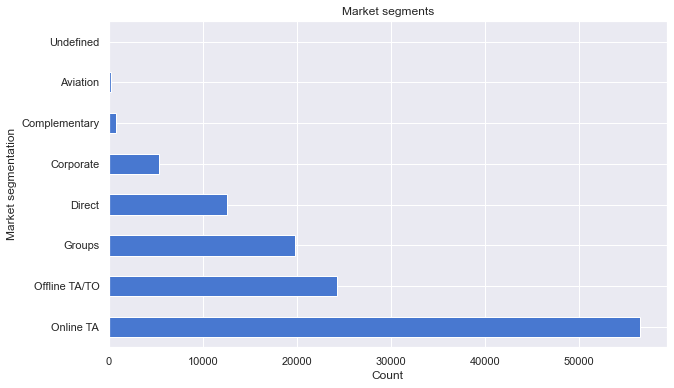

In [65]:
plt.figure(figsize=(10,6))
Hotel_bookings['market_segment'].value_counts().plot(kind='barh')

plt.title('Market segments')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Market segmentation', fontsize=12);

The majority of bookings were made by online travel agency sites.

<Figure size 864x504 with 0 Axes>

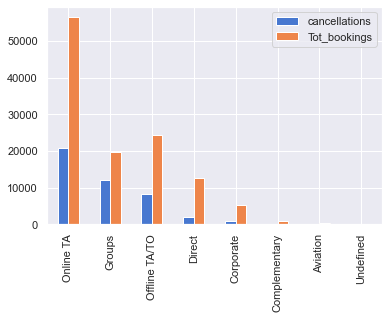

In [66]:
#  Plot cancellation vs  market segment
cancellations_per_market_segment = pd.concat([
    Hotel_bookings.groupby('market_segment').sum()['is_canceled'].sort_values(ascending=False),
   Hotel_bookings['market_segment'].value_counts()], axis=1).rename(columns={'is_canceled':'cancellations', 'market_segment': 'Tot_bookings'})
plt.figure(figsize=(12,7))
cancellations_per_market_segment.plot.bar();

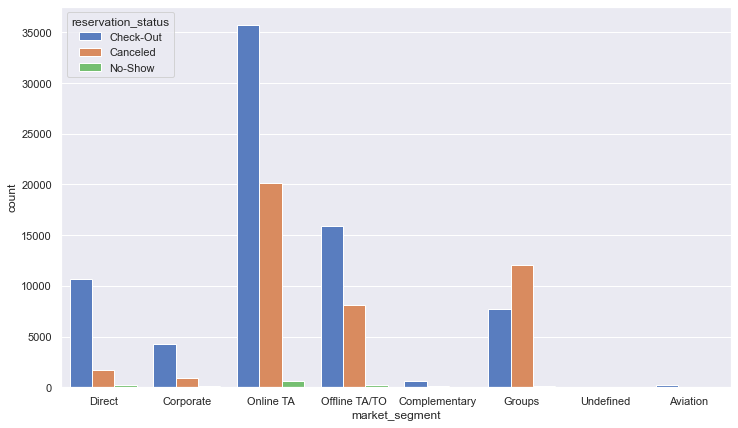

In [67]:
plt.figure(figsize=(12, 7))
sns.countplot( x='market_segment',hue='reservation_status', data=Hotel_bookings);

Hotel distribution channel are platforms that these hotels used to promote and sell its rooms. Examples include online travel agents, directly with hotels and coporate bookings. 

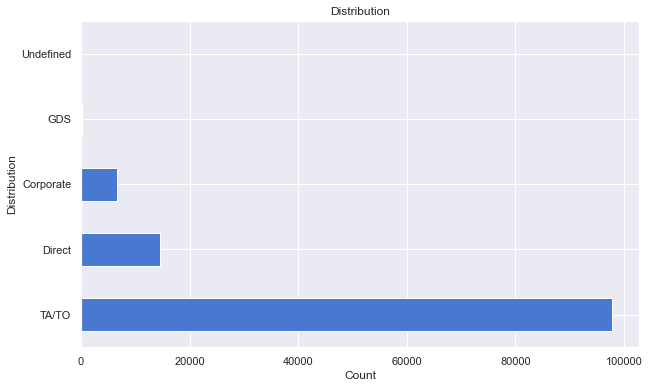

In [68]:
 

plt.figure(figsize=(10,6))
Hotel_bookings['distribution_channel'].value_counts().plot(kind='barh')

plt.title('Distribution')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Distribution', fontsize=12);

<Figure size 864x504 with 0 Axes>

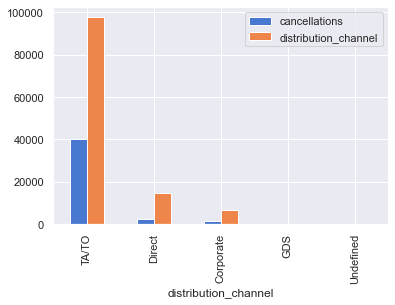

In [69]:
#  Plot cancellation vs  market segment
cancellations_per_channel = pd.concat([
    Hotel_bookings.groupby('distribution_channel').sum()['is_canceled'].sort_values(ascending=False),
   Hotel_bookings['distribution_channel'].value_counts()], axis=1).rename(columns={'is_canceled':'cancellations', 'market_segment': 'Tot_bookings'})
plt.figure(figsize=(12,7))
cancellations_per_channel.plot.bar();

 Contract - when the booking has a type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking

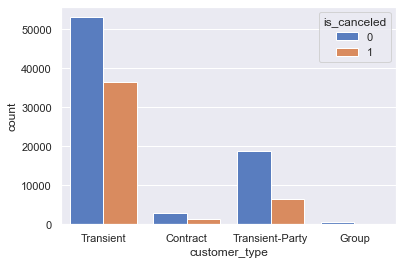

In [70]:
sns.countplot(x='customer_type',data=Hotel_bookings,hue='is_canceled')
plt.show()

Highest cancelled bookings were from transient guests.

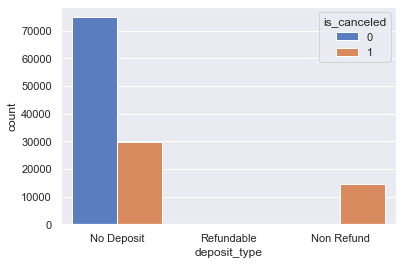

In [71]:
sns.countplot(x='deposit_type',data=Hotel_bookings,hue='is_canceled')
plt.show()

Interestingly, there were more than 10000 bookings cancelled despite no refunds of bookings.

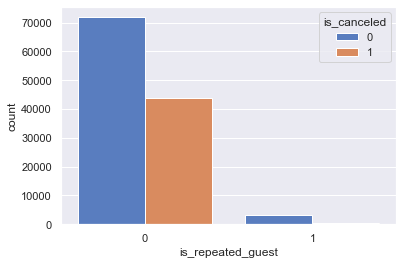

In [72]:
sns.countplot(x='is_repeated_guest',data=Hotel_bookings,hue='is_canceled')
plt.show()

From the visualisation, we cant seem to see any cancelled booking from a repeated hotel guest.

Text(0, 0.5, 'Count')

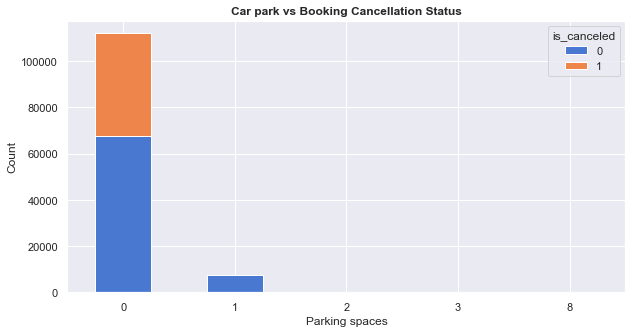

In [73]:
# Plot parking vs cancellations
car_parking = Hotel_bookings.groupby([ 'required_car_parking_spaces', 'is_canceled']).size().unstack(fill_value=0)
car_parking.plot(kind='bar', stacked=True, figsize=(10,5))
plt.title('Car park vs Booking Cancellation Status', weight='bold')
plt.xlabel('Parking spaces', fontsize=12)
plt.xticks(rotation=360)
plt.ylabel('Count')

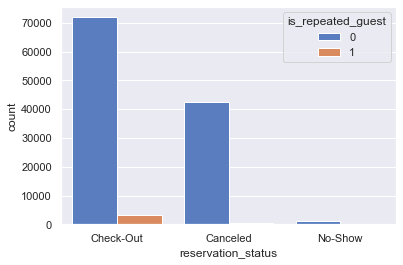

In [74]:
sns.countplot(x='reservation_status', hue='is_repeated_guest', data=Hotel_bookings);

Correlations are a great way to discover relationships between numerical variables. 

In [75]:
corr_matrix = Hotel_bookings.corr()
print(corr_matrix["is_canceled"].sort_values(ascending=False))

is_canceled                       1.000000
lead_time                         0.293133
previous_cancellations            0.110135
adults                            0.060015
days_in_waiting_list              0.054188
adr                               0.048708
stays_in_week_nights              0.024773
arrival_date_year                 0.016662
arrival_date_week_number          0.008160
children                          0.005051
stays_in_weekend_nights          -0.001781
all_children                     -0.002805
arrival_date_day_of_month        -0.006142
babies                           -0.032490
previous_bookings_not_canceled   -0.057357
is_repeated_guest                -0.084792
booking_changes                  -0.144396
required_car_parking_spaces      -0.195496
total_of_special_requests        -0.234652
Name: is_canceled, dtype: float64


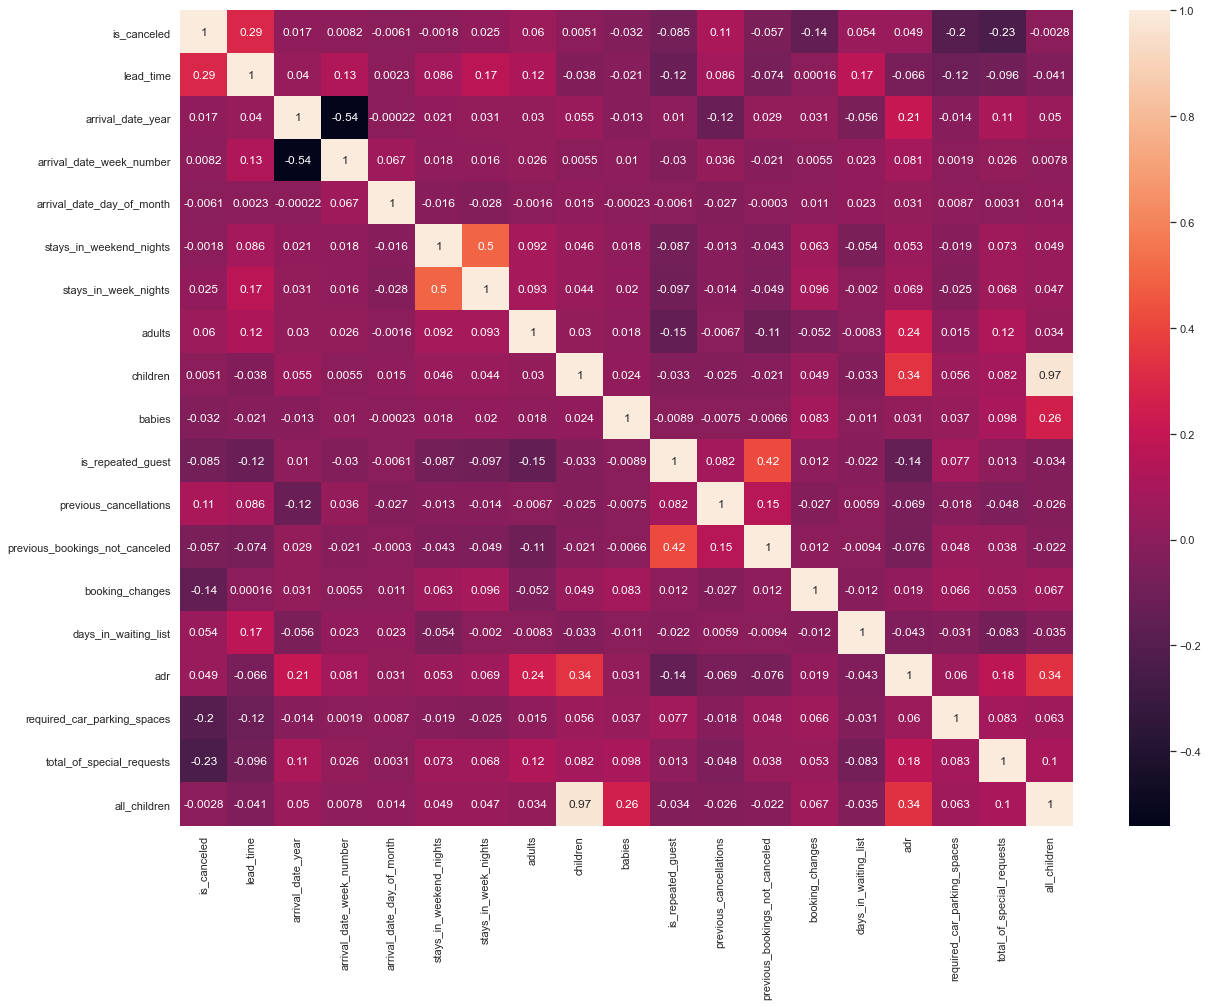

In [76]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.subplots(figsize=(20,15))
sn.heatmap(corr_matrix, annot=True)
plt.show()

Correlation values are rather on the lower side, signifiying a weak correlation between these variables.We will be focusing our model to predict cancellation, hence we note the correlation between these variables and target variable of "is_canceled'.Lead time has the highest correlation to cancellation, based on the heatmap.

## Set Target Variable 

We aim predict the cancellation rate among the hotel guests. Hence, our target variable will be set is "is_canceled".In this part, we will visualize some key features and show statistical relationship with variable of cancellation. This provides an overview of the given dataset and enhances our understanding of data.

In [77]:
#is_cancelled is the target variable.
Hotel_bookings['is_canceled']

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_canceled, Length: 119389, dtype: int64

In [78]:
y= Hotel_bookings['is_canceled']

## Predictor variables

In [79]:
print_categories('hotel')

hotel :  Categorical
is_canceled :  Numerical
lead_time :  Numerical
arrival_date_year :  Numerical
arrival_date_month :  Categorical
arrival_date_week_number :  Numerical
arrival_date_day_of_month :  Numerical
stays_in_weekend_nights :  Numerical
stays_in_week_nights :  Numerical
adults :  Numerical
children :  Numerical
babies :  Numerical
meal :  Categorical
country :  Categorical
market_segment :  Categorical
distribution_channel :  Categorical
is_repeated_guest :  Numerical
previous_cancellations :  Numerical
previous_bookings_not_canceled :  Numerical
reserved_room_type :  Categorical
assigned_room_type :  Categorical
booking_changes :  Numerical
deposit_type :  Categorical
days_in_waiting_list :  Numerical
customer_type :  Categorical
adr :  Numerical
required_car_parking_spaces :  Numerical
total_of_special_requests :  Numerical
reservation_status :  Categorical
reservation_status_date :  Categorical
all_children :  Numerical


# Machine Learning Model-Logistic Regression

We will need to drop reservation status as directly related to Target variable (Checked out or Cancelled). 

In [80]:
Hotel_bookings.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
days_in_waiting_list              

In [81]:
[(Hotel_bookings['adults']> 0)]

[0         True
 1         True
 2         True
 3         True
 4         True
           ... 
 119385    True
 119386    True
 119387    True
 119388    True
 119389    True
 Name: adults, Length: 119389, dtype: bool]

In [82]:
Hotel_bookings.loc[(Hotel_bookings['adults'] > 0) & (Hotel_bookings['all_children']>0)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,all_children
13,Resort Hotel,0,18,2015,July,27,1,0,4,2,...,1,No Deposit,0,Transient,154.77,0,1,Check-Out,2015-07-05,1
45,Resort Hotel,1,47,2015,July,27,2,2,5,2,...,0,No Deposit,0,Transient,153.00,0,0,Canceled,2015-06-02,2
55,Resort Hotel,0,1,2015,July,27,2,0,1,2,...,0,No Deposit,0,Transient,107.00,1,2,Check-Out,2015-07-03,2
65,Resort Hotel,0,10,2015,July,27,3,0,2,2,...,0,No Deposit,0,Transient,153.00,1,0,Check-Out,2015-07-05,2
87,Resort Hotel,1,79,2015,July,27,3,6,15,2,...,0,No Deposit,0,Transient,108.73,0,2,Canceled,2015-04-15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119270,City Hotel,0,0,2017,August,35,29,0,3,2,...,1,No Deposit,0,Transient,135.00,0,2,Check-Out,2017-09-01,1
119287,City Hotel,0,167,2017,August,35,27,2,4,2,...,1,No Deposit,0,Transient,177.75,0,0,Check-Out,2017-09-02,1
119293,City Hotel,0,243,2017,August,35,30,0,3,2,...,0,No Deposit,0,Transient,189.00,0,3,Check-Out,2017-09-02,2
119318,City Hotel,0,160,2017,August,35,29,0,5,2,...,0,No Deposit,0,Transient,153.90,0,0,Check-Out,2017-09-03,1


In [83]:
family_hotel= Hotel_bookings.loc[(Hotel_bookings['adults'] > 0) & (Hotel_bookings['all_children']>0)]

Out of 119390, bookings,only 9109 of these bookings were made for family stays. In this case, we can make an assumption that majority of stays was booked for stay of singles,couples or group of friends/relatives(centering around adults).Hence, predicting the probability amongst families may not be as useful for these hotels (as we do not have sufficient data) to fit into our ML models.

In [84]:
Hotel_bookings = Hotel_bookings.drop (columns= ['reservation_status', 'children','babies','reservation_status_date'])

In [85]:

Hotel_bookings

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,all_children
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,C,3,No Deposit,0,Transient,0.00,0,0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,C,4,No Deposit,0,Transient,0.00,0,0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,A,C,0,No Deposit,0,Transient,75.00,0,0,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,A,0,No Deposit,0,Transient,75.00,0,0,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,A,0,No Deposit,0,Transient,98.00,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,A,0,No Deposit,0,Transient,96.14,0,0,0
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,E,0,No Deposit,0,Transient,225.43,0,2,0
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,D,0,No Deposit,0,Transient,157.71,0,4,0
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,A,0,No Deposit,0,Transient,104.40,0,0,0


In [86]:
print_categories('hotel')

hotel :  Categorical
is_canceled :  Numerical
lead_time :  Numerical
arrival_date_year :  Numerical
arrival_date_month :  Categorical
arrival_date_week_number :  Numerical
arrival_date_day_of_month :  Numerical
stays_in_weekend_nights :  Numerical
stays_in_week_nights :  Numerical
adults :  Numerical
meal :  Categorical
country :  Categorical
market_segment :  Categorical
distribution_channel :  Categorical
is_repeated_guest :  Numerical
previous_cancellations :  Numerical
previous_bookings_not_canceled :  Numerical
reserved_room_type :  Categorical
assigned_room_type :  Categorical
booking_changes :  Numerical
deposit_type :  Categorical
days_in_waiting_list :  Numerical
customer_type :  Categorical
adr :  Numerical
required_car_parking_spaces :  Numerical
total_of_special_requests :  Numerical
all_children :  Numerical


In [87]:
#Encode categorical variables to run logistic regression model

Hotel_bookings_with_dummies = pd.get_dummies(data = Hotel_bookings, columns = ['hotel','arrival_date_month', 'arrival_date_year','meal','market_segment', 
                   'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type','country','lead_time'], 
                                      prefix = ['hotel','arrival month', 'arrival year','meal','market segment', 
                   'distribution channel', 'reserved room', 'assigned room', 'deposit', 'customer', 'country','lead'] )
Hotel_bookings_with_dummies.head()

,is_canceled,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,...,lead_594,lead_601,lead_605,lead_608,lead_615,lead_622,lead_626,lead_629,lead_709,lead_737
0,0,27,1,0,0,2,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
1,0,27,1,0,0,2,0,0,0,4,...,0,0,0,0,0,0,0,0,0,1
2,0,27,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,27,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,27,1,0,2,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
Hotel_bookings_with_dummies.tail()

,is_canceled,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,...,lead_594,lead_601,lead_605,lead_608,lead_615,lead_622,lead_626,lead_629,lead_709,lead_737
119385,0,35,30,2,5,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
119386,0,35,31,2,5,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
119387,0,35,31,2,5,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
119388,0,35,31,2,5,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
119389,0,35,29,2,7,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
# Take all columns except target as predictor columns
predictor_columns = [c for c in Hotel_bookings_with_dummies.columns if c != 'is_canceled']
# Load the dataset as a pandas data frame
X = pd.DataFrame(Hotel_bookings_with_dummies, columns = predictor_columns)

In [90]:
X

,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,...,lead_594,lead_601,lead_605,lead_608,lead_615,lead_622,lead_626,lead_629,lead_709,lead_737
0,27,1,0,0,2,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
1,27,1,0,0,2,0,0,0,4,0,...,0,0,0,0,0,0,0,0,0,1
2,27,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,27,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,27,1,0,2,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,35,30,2,5,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
119386,35,31,2,5,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
119387,35,31,2,5,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
119388,35,31,2,5,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
#Target variable
y= Hotel_bookings['is_canceled']

In [92]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()





In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [94]:
logreg.fit(X_train,y_train)

/Users/sbuvana/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

K-fold cross-validation
Testing accuracy provides a high variance estimate since changing which observations happen to be in the testing set can significantly change testing accuracy.


This is more accurate estimate of out-of-sample accuracy

In [95]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg, X_train, y_train, cv=5)
print('Cross-Validation Accuracy Scores', scores)

/Users/sbuvana/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sbuvana/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

Cross-Validation Accuracy Scores [0.80610375 0.80373783 0.80127735 0.79829337 0.79897393]


/Users/sbuvana/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [96]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.7982933724217359, 0.8016772473693503, 0.8061037533371722)

cross_val_score object allows us to see how well our model generalizes and accuracy score is pretty good at 0.80.

In [97]:
from sklearn import metrics

In [98]:
#confusion matrix 
y_pred = logreg.predict (X_test)
print(metrics.confusion_matrix(y_test,y_pred))

[[13670  1408]
 [ 3322  5478]]


###### Basic terminology:


True Positives (TP): we correctly predicted the room cancellations
5478.
True Negatives (TN): we correctly predicted the non cancellations 
13670.
False Positives (FP): we incorrectly predicted the room cancellations
1408.
False Negatives (FN): we incorrectly predicted that the non cancellations
3322.

In [99]:
cm = confusion_matrix(y_test, y_pred)

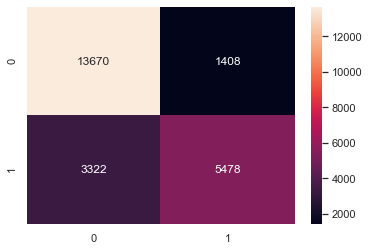

In [100]:
sns.heatmap(cm, annot=True, fmt= "d");

In [101]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85     15078
           1       0.80      0.62      0.70      8800

    accuracy                           0.80     23878
   macro avg       0.80      0.76      0.78     23878
weighted avg       0.80      0.80      0.80     23878



Precision: When a positive value is predicted, how often is the prediction correct?

In [102]:
def plot_roc_curve (X_test,y_test):
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
    preds = logreg.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
    fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
    roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc = "lower right")
    plt.show()

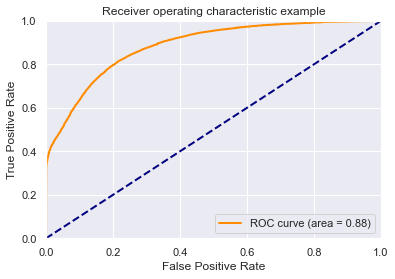

In [103]:
plot_roc_curve (X_train,y_train)

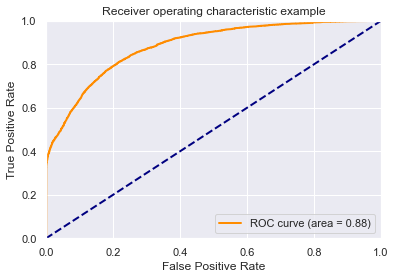

In [104]:
plot_roc_curve (X_test,y_test)

# Logistic Regression Model Results

We got cross validation accuracy score of  0.80, 80% of the time classified correctly.
Precision: Precision is about accuracy of our binary logistic model. In this prediction case, when our model predicted room booking cancellations, 80% of the time there has been cancellations (predictions were correct).

AUC scores for the case for both train and test sets are 0.88, representing a good classifier. Overfitting is unlikely.

With 80% accuracy, more than eight times out of ten, our model correctly predicts whether a reservation will be successfully booked or cancelled.


# Other Machine Learning Models-Predicting Cancellation Rate with Machine Learning

Now that we have used some of the supervised  Machine Learning techniques of Linear and Logisitic Regression to predict the cancellation rate amongst the Hotel Guests, given the multiple predictor variables.  We will be proceeding with other Machine Learning tools to explore the accuracy models in tackling the same problem statement and if they are better suited to Hotel Operators needs in identifying the trends.

# Machine Learning Model- Linear Regression

In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [106]:
Hotel_bookings

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,all_children
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,C,3,No Deposit,0,Transient,0.00,0,0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,C,4,No Deposit,0,Transient,0.00,0,0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,A,C,0,No Deposit,0,Transient,75.00,0,0,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,A,0,No Deposit,0,Transient,75.00,0,0,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,A,0,No Deposit,0,Transient,98.00,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,A,0,No Deposit,0,Transient,96.14,0,0,0
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,E,0,No Deposit,0,Transient,225.43,0,2,0
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,D,0,No Deposit,0,Transient,157.71,0,4,0
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,A,0,No Deposit,0,Transient,104.40,0,0,0


In [107]:
y

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_canceled, Length: 119389, dtype: int64

In [108]:
Hotel_bookings = Hotel_bookings.drop (columns= ['country'])

In [109]:
def long_short_lead(x):
    if x >100:
        long_short_lead = '1'
        
    else:
            long_short_lead = '0'
    return long_short_lead

In [110]:
Hotel_bookings['lead_time_band']=Hotel_bookings["lead_time"].apply(long_short_lead)


In [111]:
Hotel_bookings

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,all_children,lead_time_band
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,0,1
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,0,1
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,0,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,0,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,0,0
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,0,1
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,0,0
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,0,1


In [112]:
Hotel_bookings_1 = Hotel_bookings.drop (columns= ['lead_time'])

In [113]:
#Encode categorical variables to run logistic regression model

Hotel_bookings_with_dummies = pd.get_dummies(data = Hotel_bookings_1, columns = ['hotel','arrival_date_month', 'arrival_date_year','meal','market_segment', 
                   'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type'], 
                                      prefix = ['hotel','arrival month', 'arrival year','meal','market segment', 
                   'distribution channel', 'reserved room', 'assigned room', 'deposit', 'customer'] )
Hotel_bookings_with_dummies.head()

,is_canceled,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,...,assigned room_K,assigned room_L,assigned room_P,deposit_No Deposit,deposit_Non Refund,deposit_Refundable,customer_Contract,customer_Group,customer_Transient,customer_Transient-Party
0,0,27,1,0,0,2,0,0,0,3,...,0,0,0,1,0,0,0,0,1,0
1,0,27,1,0,0,2,0,0,0,4,...,0,0,0,1,0,0,0,0,1,0
2,0,27,1,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,27,1,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,27,1,0,2,2,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [114]:
# Take all columns except target as predictor columns
predictor_columns = [c for c in Hotel_bookings_with_dummies.columns if c != 'is_canceled']
# Load the dataset as a pandas data frame
X = pd.DataFrame(Hotel_bookings_with_dummies, columns = predictor_columns)

In [115]:
X

,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,...,assigned room_K,assigned room_L,assigned room_P,deposit_No Deposit,deposit_Non Refund,deposit_Refundable,customer_Contract,customer_Group,customer_Transient,customer_Transient-Party
0,27,1,0,0,2,0,0,0,3,0,...,0,0,0,1,0,0,0,0,1,0
1,27,1,0,0,2,0,0,0,4,0,...,0,0,0,1,0,0,0,0,1,0
2,27,1,0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,27,1,0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,27,1,0,2,2,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,35,30,2,5,2,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
119386,35,31,2,5,3,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
119387,35,31,2,5,2,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
119388,35,31,2,5,2,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [116]:
X.columns

Index(['arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'all_children', 'lead_time_band',
       'hotel_City Hotel', 'hotel_Resort Hotel', 'arrival month_April',
       'arrival month_August', 'arrival month_December',
       'arrival month_February', 'arrival month_January', 'arrival month_July',
       'arrival month_June', 'arrival month_March', 'arrival month_May',
       'arrival month_November', 'arrival month_October',
       'arrival month_September', 'arrival year_2015', 'arrival year_2016',
       'arrival year_2017', 'meal_BB', 'meal_FB', 'meal_HB', 'meal_SC',
       'meal_Undefined', 'market segment_Aviation',
       'market segment_Complementary', 'market segment_Corporate',
       '

In [117]:
#Target variable
y= Hotel_bookings['is_canceled']

In [118]:
Hotel_bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,all_children,lead_time_band
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,0,1
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,0,1
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,0,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,0,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,0,0


In [119]:
## Create training and testing subsets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

##  Forward Feature Selection

In [120]:
## Flag intermediate output

show_steps = False   # for testing/debugging
# show_steps = False  # without showing steps

In [121]:
## Use Forward Feature Selection to pick a good model

# start with no predictors
included = []
# keep track of model and parameters
best = {'feature': '', 'r2': 0, 'a_r2': 0}
# create a model object to hold the modelling parameters
model = LinearRegression() # create a model for Linear Regression
# get the number of cases in the test data
n = X_test.shape[0]

while True:
    changed = False
    
    if show_steps:
        print('') 

    # list the features to be evaluated
    excluded = list(set(X.columns) - set(included))
    
    if show_steps:
        print('(Step) Excluded = %s' % ', '.join(excluded))  

    # for each remaining feature to be evaluated
    for new_column in excluded:
        
        if show_steps:
            print('(Step) Trying %s...' % new_column)
            print('(Step) - Features = %s' % ', '.join(included + [new_column]))

        # fit the model with the Training data
        fit = model.fit (X_train[included + [new_column]], y_train)# fit a model; consider which predictors should be included
        # calculate the score (R^2 for Regression)
        r2 = fit.score (X_train[included + [new_column]], y_train) # calculate the score
        # number of predictors in this model
        k = len(included) + 1
        # calculate the adjusted R^2
        adjusted_r2 = 1- ( ( (1-r2) * (n-1) )/(n-k-1) )# calculate the Adjusted R^2

        if show_steps:
            print('(Step) - Adjusted R^2: This = %.3f; Best = %.3f' % 
                  (adjusted_r2, best['a_r2']))

        # if model improves
        if adjusted_r2 > best['a_r2']:
            # record new parameters
            best = {'feature': new_column, 'r2': r2, 'a_r2': adjusted_r2}
            # flag that found a better model
            changed = True
            if show_steps:
                print('(Step) - New Best!   : Feature = %s; R^2 = %.3f; Adjusted R^2 = %.3f' % 
                    (best['feature'], best['r2'], best['a_r2']))
    # END for

    # if found a better model after testing all remaining features
    if changed:
        # update control details
        included.append(best['feature'])
        excluded = list(set(excluded) - set(best['feature']))
        
        print('Added feature %-4s with R^2 = %.3f and adjusted R^2 = %.3f' % (best['feature'], best['r2'], best['a_r2']))
    else:
        # terminate if no better model
        break

print('')
print('Resulting features:')
print(', '.join(included))

Added feature deposit_Non Refund with R^2 = 0.232 and adjusted R^2 = 0.232
Added feature market segment_Online TA with R^2 = 0.261 and adjusted R^2 = 0.261
Added feature total_of_special_requests with R^2 = 0.293 and adjusted R^2 = 0.293
Added feature required_car_parking_spaces with R^2 = 0.311 and adjusted R^2 = 0.311
Added feature lead_time_band with R^2 = 0.323 and adjusted R^2 = 0.323
Added feature adr  with R^2 = 0.327 and adjusted R^2 = 0.327
Added feature booking_changes with R^2 = 0.331 and adjusted R^2 = 0.331
Added feature assigned room_A with R^2 = 0.335 and adjusted R^2 = 0.334
Added feature reserved room_A with R^2 = 0.342 and adjusted R^2 = 0.341
Added feature previous_cancellations with R^2 = 0.344 and adjusted R^2 = 0.343
Added feature market segment_Offline TA/TO with R^2 = 0.345 and adjusted R^2 = 0.345
Added feature stays_in_week_nights with R^2 = 0.347 and adjusted R^2 = 0.347
Added feature customer_Transient with R^2 = 0.349 and adjusted R^2 = 0.348
Added feature 

Resulting features (49 columns):
deposit_Non Refund, market segment_Online TA, total_of_special_requests, required_car_parking_spaces, lead_time_band, adr, booking_changes, assigned room_A, reserved room_A, previous_cancellations, market segment_Offline TA/TO, stays_in_week_nights, customer_Transient, adults, all_children, distribution channel_TA/TO, assigned room_F, reserved room_P, arrival month_December, arrival year_2016, meal_Undefined, market segment_Complementary, arrival month_February, assigned room_G, customer_Transient-Party, stays_in_weekend_nights, distribution channel_Corporate, reserved room_D, arrival month_October, meal_HB, market segment_Undefined, previous_bookings_not_canceled, assigned room_D, hotel_City Hotel, assigned room_B, reserved room_B, arrival month_March, distribution channel_GDS, arrival month_June, reserved room_G, reserved room_E, assigned room_C, is_repeated_guest, customer_Group, arrival month_November, arrival_date_week_number, arrival year_2017, arrival month_August, assigned room_L

In [122]:
predictor_columns = ['deposit_Non Refund', 'market segment_Online TA', 'total_of_special_requests', 'required_car_parking_spaces', 'lead_time_band', 'adr', 'booking_changes', 'assigned room_A', 'reserved room_A', 'previous_cancellations',
                                                'market segment_Offline TA/TO',
                                                'stays_in_week_nights', 'customer_Transient', 'adults', 'all_children', 'distribution channel_TA/TO',
                                                'assigned room_F', 'reserved room_P', 'arrival month_December', 'arrival year_2016', 'meal_Undefined', 'market segment_Complementary', 'arrival month_February',
                                                'assigned room_G', 'customer_Transient-Party', 'stays_in_weekend_nights', 'distribution channel_Corporate', 'reserved room_D', 'arrival month_October', 'meal_HB', 'market segment_Undefined', 'previous_bookings_not_canceled', 'assigned room_D',
                                                'hotel_City Hotel', 'assigned room_B', 'reserved room_B', 'arrival month_March', 'distribution channel_GDS', 'arrival month_June', 'reserved room_G', 'reserved room_E', 'assigned room_C', 'is_repeated_guest',  'customer_Group', 'arrival month_November', 'arrival_date_week_number', 'arrival year_2017', 'arrival month_August', 'assigned room_L']

In [123]:
X = Hotel_bookings_with_dummies[predictor_columns]
X.head()

,deposit_Non Refund,market segment_Online TA,total_of_special_requests,required_car_parking_spaces,lead_time_band,adr,booking_changes,assigned room_A,reserved room_A,previous_cancellations,...,reserved room_G,reserved room_E,assigned room_C,is_repeated_guest,customer_Group,arrival month_November,arrival_date_week_number,arrival year_2017,arrival month_August,assigned room_L
0,0,0,0,0,1,0.0,3,0,0,0,...,0,0,1,0,0,0,27,0,0,0
1,0,0,0,0,1,0.0,4,0,0,0,...,0,0,1,0,0,0,27,0,0,0
2,0,0,0,0,0,75.0,0,0,1,0,...,0,0,1,0,0,0,27,0,0,0
3,0,0,0,0,0,75.0,0,1,1,0,...,0,0,0,0,0,0,27,0,0,0
4,0,1,1,0,0,98.0,0,1,1,0,...,0,0,0,0,0,0,27,0,0,0


In [124]:
y= Hotel_bookings['is_canceled']

In [125]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_canceled, dtype: int64

In [126]:
## Create training and testing subsets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [127]:
# Create a model for Linear Regression

# Fit the model with the Training data


linreg = LinearRegression()
linreg.fit(X_train, y_train)

linreg.score(X_train,y_train)



0.3553174360481688

In [128]:
#score using x and y test

linreg.score(X_test,y_test)

0.35388932686638297

In [129]:
linreg_coef_df = pd.DataFrame ({'feature' : X.columns, 'coefficient': linreg.coef_})
linreg_coef_df

,feature,coefficient
0,deposit_Non Refund,0.615251
1,market segment_Online TA,0.124512
2,total_of_special_requests,-0.118798
3,required_car_parking_spaces,-0.248305
4,lead_time_band,0.099623
5,adr,0.000693
6,booking_changes,-0.045781
7,assigned room_A,0.206501
8,reserved room_A,-0.149738
9,previous_cancellations,0.024949


In [130]:

y_preds = linreg.predict (X_test)
print ("cancelled or not:", y_pred[0])

cancelled or not: 1


In [131]:
from sklearn.metrics import mean_squared_error

In [132]:
mean_squared_error(y_test,y_preds, squared=True)

0.1503617704213066

In [133]:
y.unique()

array([0, 1])

# Machine Learning Model- KNN Classifier

In [134]:
from sklearn.neighbors import KNeighborsClassifier

In [135]:
# Take all columns except target as predictor columns
predictor_columns = [c for c in Hotel_bookings.columns if c != 'is_canceled']
# Load the dataset as a pandas data frame
X = pd.DataFrame(Hotel_bookings, columns = predictor_columns)



In [136]:
y= Hotel_bookings['is_canceled']

In [137]:
model_k = KNeighborsClassifier(n_neighbors=4)
model_k.fit(X_train, y_train)
y_pred = model_k.predict(X_test)


In [138]:
scores = cross_val_score(model_k, X_train, y_train, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())



[0.78936348 0.79845042 0.79865983 0.79405298 0.79290127 0.79468119
 0.79489059 0.79143545 0.79133075 0.79091195]
0.7936677901425602


              precision    recall  f1-score   support

           0       0.80      0.90      0.85     15078
           1       0.78      0.61      0.69      8800

    accuracy                           0.79     23878
   macro avg       0.79      0.76      0.77     23878
weighted avg       0.79      0.79      0.79     23878



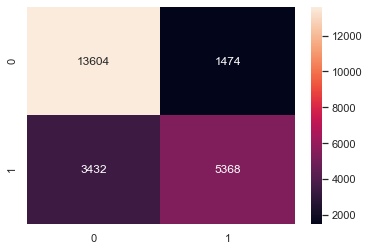

In [139]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt = 'd');

print(classification_report(y_test, y_pred))

## Model Results

The cv accuracy score of 79% from the unsupervised technique performs in comparison to linear regression model.

# Machine Learning Model- Naive Bayes Classifier

We will use Naive Bayes classifier algorithm next to check if the model performs better than linear regression. This technique assumes that the feature in a class is independent of any other features.This is implemented in this classification problem of predicting cancelation rate.

In [140]:
from sklearn.naive_bayes import GaussianNB

In [141]:
Hotel_bookings.shape

(119389, 27)

In [142]:
Hotel_bookings_with_dummies = pd.get_dummies(data = Hotel_bookings, columns = ['hotel','arrival_date_month', 'arrival_date_year','meal','market_segment', 
                   'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type','lead_time'], 
                                      prefix = ['hotel','arrival month', 'arrival year','meal','market segment', 
                   'distribution channel', 'reserved room', 'assigned room', 'deposit', 'customer','lead'] )
Hotel_bookings_with_dummies.head()

,is_canceled,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,...,lead_594,lead_601,lead_605,lead_608,lead_615,lead_622,lead_626,lead_629,lead_709,lead_737
0,0,27,1,0,0,2,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
1,0,27,1,0,0,2,0,0,0,4,...,0,0,0,0,0,0,0,0,0,1
2,0,27,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,27,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,27,1,0,2,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [143]:
# Take all columns except target as predictor columns
predictor_columns = [c for c in Hotel_bookings_with_dummies.columns if c != 'is_canceled']
# Load the dataset as a pandas data frame
X = pd.DataFrame(Hotel_bookings_with_dummies, columns = predictor_columns)


In [144]:

Hotel_bookings['is_canceled']

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_canceled, Length: 119389, dtype: int64

In [145]:
X.isnull().sum()

arrival_date_week_number     0
arrival_date_day_of_month    0
stays_in_weekend_nights      0
stays_in_week_nights         0
adults                       0
                            ..
lead_622                     0
lead_626                     0
lead_629                     0
lead_709                     0
lead_737                     0
Length: 558, dtype: int64

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [147]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [148]:


gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)



scores = cross_val_score(gnb_model, X_train, y_train, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())



[0.72016332 0.70013611 0.72693959 0.71720239 0.71584127 0.71374725
 0.72358915 0.71406135 0.72159983 0.73866611]
0.7191946375948426


In [149]:
y_pred = gnb_model.predict (X_test)

              precision    recall  f1-score   support

           0       0.70      0.98      0.81     15078
           1       0.88      0.27      0.41      8800

    accuracy                           0.72     23878
   macro avg       0.79      0.62      0.61     23878
weighted avg       0.76      0.72      0.67     23878



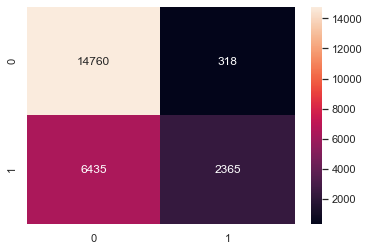

In [150]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt = 'd');

print(classification_report(y_test, y_pred))

## Model Results 

The accuracy score of 71% from Naive Bayes is higher compared to linear regression model. However, we are unable to implement this model in reality as the assumption of independence might not hold true in this case. We have features that might entail co linearity and this basic assumption doesn't hold.

Logistic regression still has the better accuracy score of 80% and has dealt with the problem statement.


# Machine Learning Model- Decision Tree

Decision tree is a supervised learning algorithm. We hope to see the feature importance and relevancy at how well the data is segregated. This will be compared with the feature selection results in the following section, for us to understand our data better and to aid in the dimensionality reduction of X.

Text(0, 0.5, 'Count')

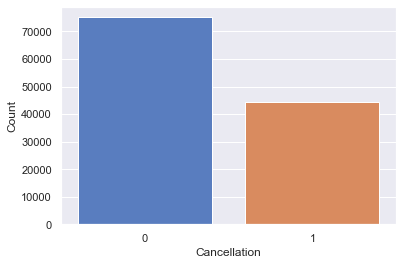

In [151]:
sns.countplot(Hotel_bookings_with_dummies['is_canceled'])
plt.xlabel("Cancellation")
plt.ylabel ("Count")

In [152]:
# Take all columns except target as predictor columns
predictor_columns = [c for c in Hotel_bookings.columns if c != 'is_canceled']
# Load the dataset as a pandas data frame
X = pd.DataFrame(Hotel_bookings, columns = predictor_columns)



In [153]:
X.columns

Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'meal',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'deposit_type', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'all_children', 'lead_time_band'],
      dtype='object')

In [154]:
# Baseline Accuracy
y.value_counts(normalize =True)

0    0.629589
1    0.370411
Name: is_canceled, dtype: float64

In [155]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
print(model_dt)

DecisionTreeClassifier()


In [156]:

model_dt = model_dt.fit(X_train,y_train)



In [157]:
y_pred = model_dt.predict(X_test)
print('Score :', accuracy_score(y_test, y_pred))

Score : 0.8325655415026384


In [158]:
scores = cross_val_score(model_dt, X_train, y_train, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

[0.83092546 0.83310648 0.83216417 0.82797613 0.8345723  0.82818553
 0.83258298 0.83143126 0.83258298 0.83394409]
0.8317471372059405


              precision    recall  f1-score   support

           0       0.87      0.87      0.87     15078
           1       0.78      0.77      0.77      8800

    accuracy                           0.83     23878
   macro avg       0.82      0.82      0.82     23878
weighted avg       0.83      0.83      0.83     23878



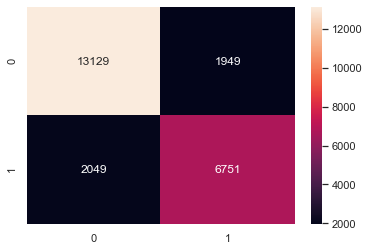

In [159]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt = 'd');

print(classification_report(y_test, y_pred))

## Model Results 

Implementing Decision tree classifier machine serves as a best prediction model with the cross validation accuracy score of 83%. 

# Determining Relevant Features

We would need to perform machine learning models to train the dataset with the key featues. As of now our X(feature variable)  has 20 plus columns. Removing the noisy features will help with memory, computational cost and the accuracy of our model. This might prevent overfitting of the models as well. 

Hence, we will carry out another round of feature selection to weed out the irrelvant features and will re run some of our supervised and unsupervised learning models (KNN and Decision Trees ).We will be reducing the dimensionality of our original datasets and implementing the models to study the difference in models' performances.



In [160]:
Hotel_bookings.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,all_children
is_canceled,1.000000,0.293133,0.016662,0.008160,-0.006142,-0.001781,0.024773,0.060015,-0.084792,0.110135,-0.057357,-0.144396,0.054188,0.048708,-0.195496,-0.234652,-0.002805
lead_time,0.293133,1.000000,0.040141,0.126866,0.002273,0.085667,0.165796,0.119520,-0.124411,0.086041,-0.073549,0.000155,0.170084,-0.065603,-0.116452,-0.095716,-0.041277
arrival_date_year,0.016662,0.040141,1.000000,-0.540566,-0.000219,0.021496,0.030882,0.029636,0.010341,-0.119822,0.029218,0.030875,-0.056497,0.207560,-0.013685,0.108530,0.049665
arrival_date_week_number,0.008160,0.126866,-0.540566,1.000000,0.066819,0.018200,0.015552,0.025911,-0.030132,0.035500,-0.020904,0.005518,0.022932,0.080500,0.001918,0.026143,0.007781
arrival_date_day_of_month,-0.006142,0.002273,-0.000219,0.066819,1.000000,-0.016346,-0.028167,-0.001568,-0.006143,-0.027010,-0.000299,0.010602,0.022729,0.030776,0.008686,0.003068,0.014007
stays_in_weekend_nights,-0.001781,0.085667,0.021496,0.018200,-0.016346,1.000000,0.498966,0.091873,-0.087241,-0.012775,-0.042716,0.063291,-0.054152,0.052639,-0.018556,0.072666,0.048603
stays_in_week_nights,0.024773,0.165796,0.030882,0.015552,-0.028167,0.498966,1.000000,0.092977,-0.097246,-0.013993,-0.048743,0.096218,-0.002021,0.069190,-0.024861,0.068187,0.047470
adults,0.060015,0.119520,0.029636,0.025911,-0.001568,0.091873,0.092977,1.000000,-0.146426,-0.006738,-0.107983,-0.051676,-0.008283,0.241824,0.014785,0.122885,0.033693
is_repeated_guest,-0.084792,-0.124411,0.010341,-0.030132,-0.006143,-0.087241,-0.097246,-0.146426,1.000000,0.082293,0.418056,0.012094,-0.022235,-0.140792,0.077089,0.013049,-0.033855
previous_cancellations,0.110135,0.086041,-0.119822,0.035500,-0.027010,-0.012775,-0.013993,-0.006738,0.082293,1.000000,0.152728,-0.026992,0.005929,-0.068798,-0.018492,-0.048385,-0.025661


In [161]:
Hotel_bookings.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'meal', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'all_children', 'lead_time_band'],
      dtype='object')

In [162]:
Hotel_bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,all_children,lead_time_band
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,0,1
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,0,1
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,0,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,0,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,0,0


In [163]:
corr_matrix = Hotel_bookings.corr()
print(corr_matrix["is_canceled"].sort_values(ascending=False))


is_canceled                       1.000000
lead_time                         0.293133
previous_cancellations            0.110135
adults                            0.060015
days_in_waiting_list              0.054188
adr                               0.048708
stays_in_week_nights              0.024773
arrival_date_year                 0.016662
arrival_date_week_number          0.008160
stays_in_weekend_nights          -0.001781
all_children                     -0.002805
arrival_date_day_of_month        -0.006142
previous_bookings_not_canceled   -0.057357
is_repeated_guest                -0.084792
booking_changes                  -0.144396
required_car_parking_spaces      -0.195496
total_of_special_requests        -0.234652
Name: is_canceled, dtype: float64


The correlation coefficients for most features in relation to cancellation rate is rather on the weaker side with lead time with a value of 0.29. We can take the first 5 features with the highest values (lead time,previous cancellations,adults, waiting list days and adr ) to build our models.

[Text(0.5, 0, 'is_canceled'),
 Text(1.5, 0, 'lead_time'),
 Text(2.5, 0, 'arrival_date_year'),
 Text(3.5, 0, 'arrival_date_week_number'),
 Text(4.5, 0, 'arrival_date_day_of_month'),
 Text(5.5, 0, 'stays_in_weekend_nights'),
 Text(6.5, 0, 'stays_in_week_nights'),
 Text(7.5, 0, 'adults'),
 Text(8.5, 0, 'is_repeated_guest'),
 Text(9.5, 0, 'previous_cancellations'),
 Text(10.5, 0, 'previous_bookings_not_canceled'),
 Text(11.5, 0, 'booking_changes'),
 Text(12.5, 0, 'days_in_waiting_list'),
 Text(13.5, 0, 'adr'),
 Text(14.5, 0, 'required_car_parking_spaces'),
 Text(15.5, 0, 'total_of_special_requests'),
 Text(16.5, 0, 'all_children')]

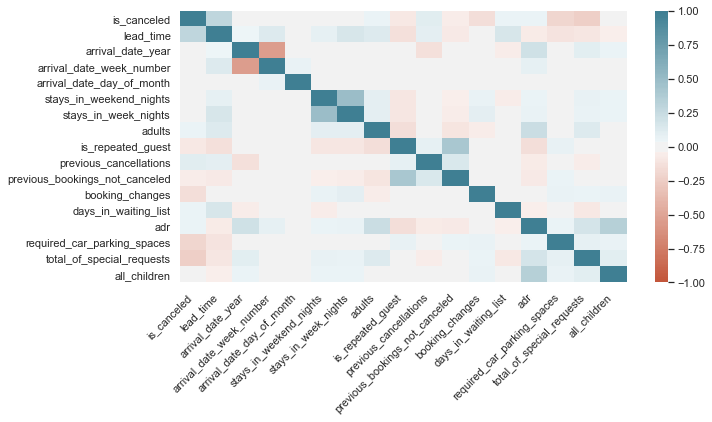

In [164]:
corr = Hotel_bookings.corr()

plt.figure(figsize = (10, 5))

ax = sns.heatmap(corr, vmin = -1, vmax = 1, center = 0, 
                 cmap = sns.diverging_palette(20, 220, n = 200))

ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

In [165]:
Hotel_bookings.groupby(['is_canceled', 'adr']).agg({'hotel' : 'count'})

hotel
is_canceled adr           
0           -6.38        1
             0.00     1746
             0.26        1
             1.00       12
             1.29        1
...                    ...
1            384.00      1
             388.00      1
             392.00      1
             437.00      1
             450.00      1

[11550 rows x 1 columns]

From this, it is rather inconclusive. We are unable to see a trend between ADR and cancellations in hotels. We can choose the next best variable of stays in weeknights to continue with our machine learning models.

# # Identified features (5)  

We have identified 5 features to be further analysed to re run our machine learning models. 

Using the following variables, the classifier is expected to determine whether a reservation will probably be canceled or not:

[lead_time, previous_cancellations,adults,days_in_waiting_list, stays_in_week_nights]

In [166]:
X= Hotel_bookings[['lead_time', 'previous_cancellations', 'adults', 
             'days_in_waiting_list', 'stays_in_week_nights']]

In [167]:
X

,lead_time,previous_cancellations,adults,days_in_waiting_list,stays_in_week_nights
0,342,0,2,0,0
1,737,0,2,0,0
2,7,0,1,0,1
3,13,0,1,0,1
4,14,0,2,0,2
...,...,...,...,...,...
119385,23,0,2,0,5
119386,102,0,3,0,5
119387,34,0,2,0,5
119388,109,0,2,0,5


#  Model Testing with Relevant Features

## Model 1- KNN with identified features

In [168]:
y=Hotel_bookings['is_canceled']

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [170]:
X_train

,lead_time,previous_cancellations,adults,days_in_waiting_list,stays_in_week_nights
59379,118,0,2,0,3
78638,29,1,2,0,3
103359,1,0,1,0,1
88666,11,0,2,0,1
75129,276,1,2,0,1
...,...,...,...,...,...
104004,88,0,2,0,1
10742,57,0,2,0,2
49690,45,0,2,0,1
58565,37,0,1,0,3


In [171]:
model_k = KNeighborsClassifier(n_neighbors=4)
model_k.fit(X_train, y_train)
y_pred = model_k.predict(X_test)
scores = cross_val_score(model_k, X_train, y_train, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

[0.71643934 0.72445561 0.7257389  0.71640541 0.71987555 0.71772167
 0.72597822 0.7269355  0.71652507 0.71915759]
0.7209232871251532


## Model 2-  Decision Tree with identified features

In [172]:
model_dt = DecisionTreeClassifier()
print(model_dt)

DecisionTreeClassifier()


In [173]:
model_dt = model_dt.fit(X_train,y_train)
y_pred = model_dt.predict(X_test)
print('Score :', accuracy_score(y_test, y_pred))
scores = cross_val_score(model_dt, X_train, y_train, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

Score : 0.7437808861713712
[0.74276143 0.74132568 0.74296997 0.73758526 0.74213234 0.73830322
 0.74787603 0.74859399 0.75014958 0.74356827]
0.7435265754804095


# Evaluation of Model 1 and 2 -Training Sets

In [174]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [175]:
# Evaluate model against training set
def show_summary_report(actual, prediction):

    if isinstance(actual, pd.Series):
        actual = actual.values
    if actual.dtype.name == 'object':
        actual = actual.astype(int)
    if prediction.dtype.name == 'object':
        prediction = prediction.astype(int)

    accuracy_ = accuracy_score(actual, prediction)
    precision_ = precision_score(actual, prediction)
    recall_ = recall_score(actual, prediction)
    roc_auc_ = roc_auc_score(actual, prediction)

    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_)
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_)
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_)
    print('ROC AUC  : %.4f                                                                     Best: 1, Worst: < 0.5' % roc_auc_)
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction)
    average_precision = average_precision_score(actual, prediction)
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, prediction)
    roc_auc = auc(fpr, tpr)

    # plot
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues', ax = ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')
    
    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    ax[1].fill_between(recall, precision, alpha = 0.2, color = 'b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc = 'lower right')

    plt.show()
    
    return (accuracy_, precision_, recall_, roc_auc_)
#results in pd df

results = pd.DataFrame (columns = ['Model', 'Accuracy', 'Precision','Recall','ROC_AUC'])

*******************
* KNN Classifier *
*******************
Accuracy : 0.7437 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7473 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.4625 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.6855                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


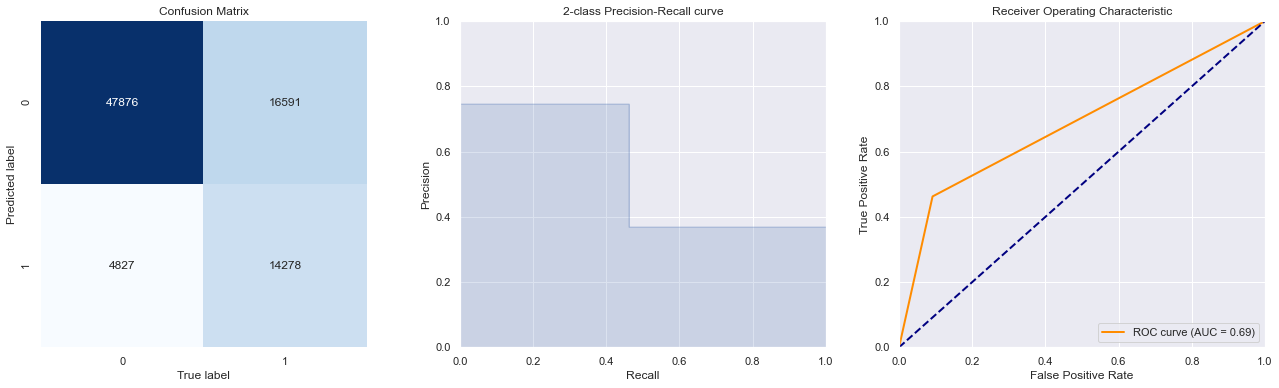

******************
* Decision tree *
******************
Accuracy : 0.7820 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.8152 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.5300 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7298                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


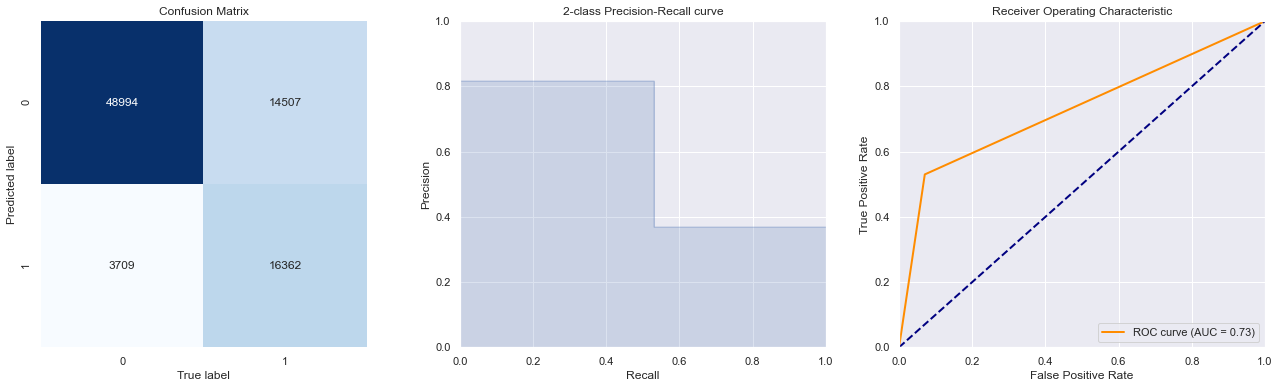

In [176]:
models = ['KNN Classifier','Decision tree']
for i, m in enumerate ([model_k,model_dt]):
    print('*' * (len(models[i]) + 5))
    print('* %s *' %models[i])
    print('*' * (len(models[i]) + 5))
    predictions = m.predict(X_train)
    
    #show report
    accuracy_, precision_, recall_, roc_auc_ = show_summary_report(y_train, predictions)
    
    results.loc[i] = {'Model':models[i],
                  'Accuracy':accuracy_, 
                  'Precision': precision_, 
                  'Recall': recall_, 
                  'ROC_AUC': roc_auc_}



In [177]:
results

,Model,Accuracy,Precision,Recall,ROC_AUC
0,KNN Classifier,0.743718,0.747344,0.462535,0.685473
1,Decision tree,0.782032,0.815206,0.530046,0.729835


# Evaluation of Model 1 and 2 -Testing Sets

## Model 3- Evaluation of Test sets

In [178]:
predictions = model_k.predict(X_test)

Accuracy : 0.7191 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.6994 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.4326 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.6610                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


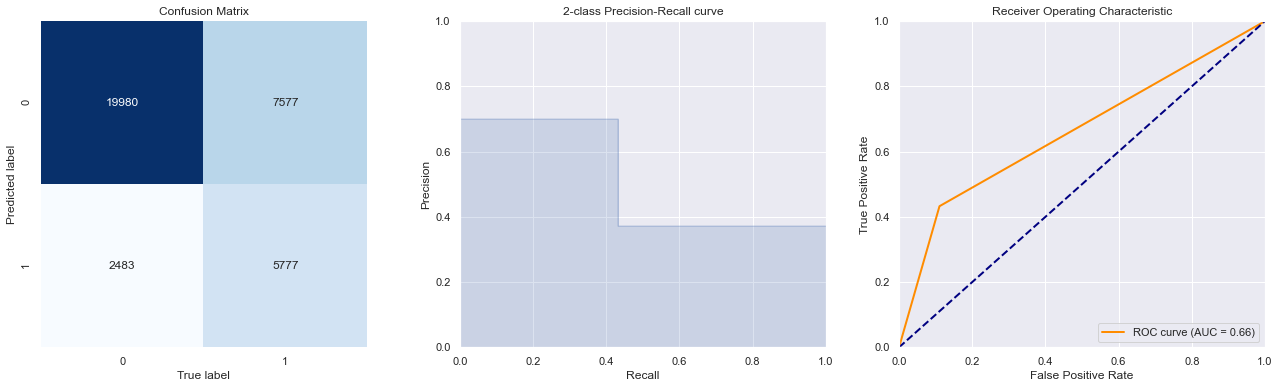

In [179]:
accuracy_, precision_, recall_, roc_auc_ = show_summary_report(y_test, predictions)

## Model 4 - Evaluation of Test Sets

In [180]:
predictions = model_dt.predict(X_test)

Accuracy : 0.7438 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7399 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.4823 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.6908                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


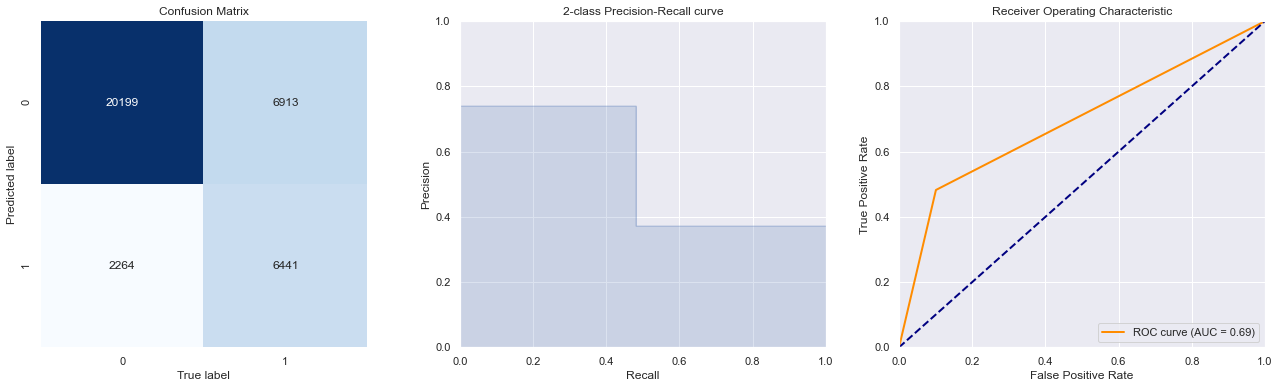

In [181]:
accuracy_, precision_, recall_, roc_auc_ = show_summary_report(y_test, predictions)

# Model 3 and 4- Identified X features with PCA

In [182]:
from sklearn.decomposition import PCA


In [183]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xs = ss.fit_transform(X)

In [184]:
Xs

array([[ 2.22704028, -0.10317995,  0.24789837, -0.13192416, -1.31024442],
       [ 5.92336483, -0.10317995,  0.24789837, -0.13192416, -1.31024442],
       [-0.90781726, -0.10317995, -1.4784396 , -0.13192416, -0.78621249],
       ...,
       [-0.6551571 , -0.10317995,  0.24789837, -0.13192416,  1.30991522],
       [ 0.04667668, -0.10317995,  0.24789837, -0.13192416,  1.30991522],
       [ 0.94502391, -0.10317995,  0.24789837, -0.13192416,  2.35797907]])

In [185]:
correlation_matrix = X.corr()

In [186]:
# Using np.linalg.eig function
eigen_values, eigen_vectors = np.linalg.eig(correlation_matrix)
print("Eigenvector: \n",eigen_vectors,"\n")
print("Eigenvalues: \n", eigen_values, "\n")

Eigenvector: 
 [[-0.67131914 -0.72140117  0.16195186  0.05145832  0.00588263]
 [-0.166723    0.24986224  0.45034147  0.00658731 -0.84078622]
 [-0.39784665  0.20761492 -0.48453886 -0.74045657 -0.12474068]
 [-0.36581014  0.46680266  0.59085876 -0.14791973  0.52657753]
 [-0.47899378  0.39514622 -0.4325184   0.65356902 -0.01413476]] 

Eigenvalues: 
 [1.30317825 0.73492995 1.05940986 0.908032   0.99444994] 



In [187]:
def calculate_cum_var_exp(eig_vals):
    '''
    Calculate Explained Variance from Eigenvalues
    
    Return a list or array containing the cumulative explained variance 
    '''
    
    var_exp = []
    cum_var_exp = []
    

    for i in range(len(eig_vals)):
        exp_var = ((eig_vals[i])/np.sum(eig_vals))*100
        var_exp.append(exp_var) 

    j=0
    for i in range(0,len(var_exp)):
        j += var_exp[i]
        cum_var_exp.append(j)
    
    return cum_var_exp



In [188]:
calculate_cum_var_exp(eigen_values)

[26.063565074631978,
 40.76216406804329,
 61.95036129795846,
 80.11100123200694,
 100.0]

In [189]:
def plot_var_exp(eig_vals):
    
    cum_var_exp = calculate_cum_var_exp(eig_vals)
    
    plt.figure(figsize=(9,7))

    component_number = [i+1 for i in range(len(cum_var_exp))]

    plt.plot(component_number, cum_var_exp, lw=7)

    plt.axhline(y=0, linewidth=5, color='grey', ls='dashed')
    plt.axhline(y=100, linewidth=3, color='grey', ls='dashed')

    ax = plt.gca()
    ax.set_xlim([1,30])
    ax.set_ylim([-5,105])

    ax.set_ylabel('Cumulative Variance Explained (%)', fontsize=16)
    ax.set_xlabel('No. of Components', fontsize=16)

    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(12) 

    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(12) 

    ax.set_title('Component vs Cumulative Variance Explained\n', fontsize=20)

    plt.show()

In [190]:
eigen_values

array([1.30317825, 0.73492995, 1.05940986, 0.908032  , 0.99444994])

In [191]:
from sklearn.decomposition import PCA
# Create an instance of PCA
pca = PCA()
# Fit Xs

pca.fit(Xs)

PCA()

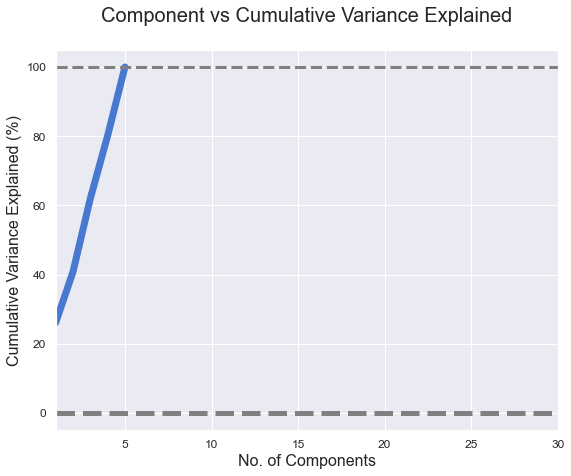

In [192]:
plot_var_exp(eigen_values)

In [193]:
# Apply dimensionality reduction to Xs using transform

pca1 = PCA(n_components=5)
# Fit Xs

pca1.fit(Xs)
pca_X = pca1.fit_transform(Xs)

# Model 3 - KNN Classifier with PCA dataset

In [194]:


# Split PCA
X_train, X_test, y_train, y_test = train_test_split(pca_X, y, test_size=0.2, random_state=1)

In [195]:
# CV accuracy of KNN using pca data 

model_k = KNeighborsClassifier(n_neighbors=4)
model_k.fit(X_train, y_train)
y_pred = model_k.predict(X_test)

scores = cross_val_score(model_k, X_train, y_train, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

[0.73209799 0.72673019 0.72484557 0.72620668 0.73206994 0.72871951
 0.73091823 0.72903361 0.72463616 0.72484557]
0.7280103434405827


# Model 4 - Decision Tree with PCA dataset

In [196]:
# Split PCA
X_train, X_test, y_train, y_test = train_test_split(pca_X, y, test_size=0.2, random_state=1)

In [197]:
model_dt = model_dt.fit(X_train,y_train)
y_pred = model_dt.predict(X_test)
print('Score :', accuracy_score(y_test, y_pred))
scores = cross_val_score(model_dt, X_train, y_train, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

Score : 0.7458748638914482
[0.74968593 0.74641399 0.74327296 0.74568108 0.74494817 0.74484347
 0.74295885 0.74515758 0.74473877 0.74295885]
0.7450659649677558


# Evaluation of Model 3 and 4- Training Sets

In [198]:
# Evaluate model against training set
def show_summary_report(actual, prediction):

    if isinstance(actual, pd.Series):
        actual = actual.values
    if actual.dtype.name == 'object':
        actual = actual.astype(int)
    if prediction.dtype.name == 'object':
        prediction = prediction.astype(int)

    accuracy_ = accuracy_score(actual, prediction)
    precision_ = precision_score(actual, prediction)
    recall_ = recall_score(actual, prediction)
    roc_auc_ = roc_auc_score(actual, prediction)

    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_)
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_)
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_)
    print('ROC AUC  : %.4f                                                                     Best: 1, Worst: < 0.5' % roc_auc_)
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction)
    average_precision = average_precision_score(actual, prediction)
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, prediction)
    roc_auc = auc(fpr, tpr)

    # plot
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues', ax = ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')
    
    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    ax[1].fill_between(recall, precision, alpha = 0.2, color = 'b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc = 'lower right')

    plt.show()
    
    return (accuracy_, precision_, recall_, roc_auc_)

In [199]:
#results in pd df

results = pd.DataFrame (columns = ['Model', 'Accuracy', 'Precision','Recall','ROC_AUC'])

****************************
* KNN Classifier with PCA *
****************************
Accuracy : 0.7475 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7650 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.4608 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.6887                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


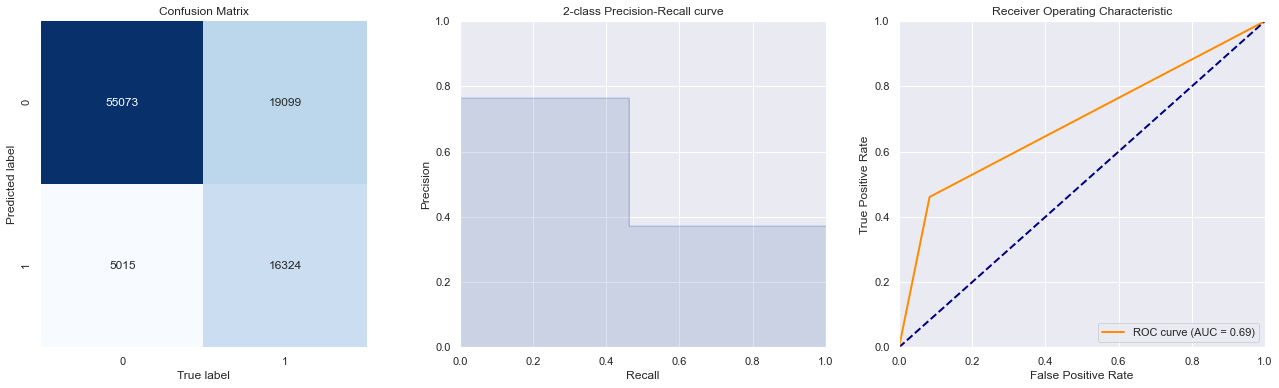

***************************
* Decision tree with PCA *
***************************
Accuracy : 0.7803 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.8089 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.5337 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7297                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


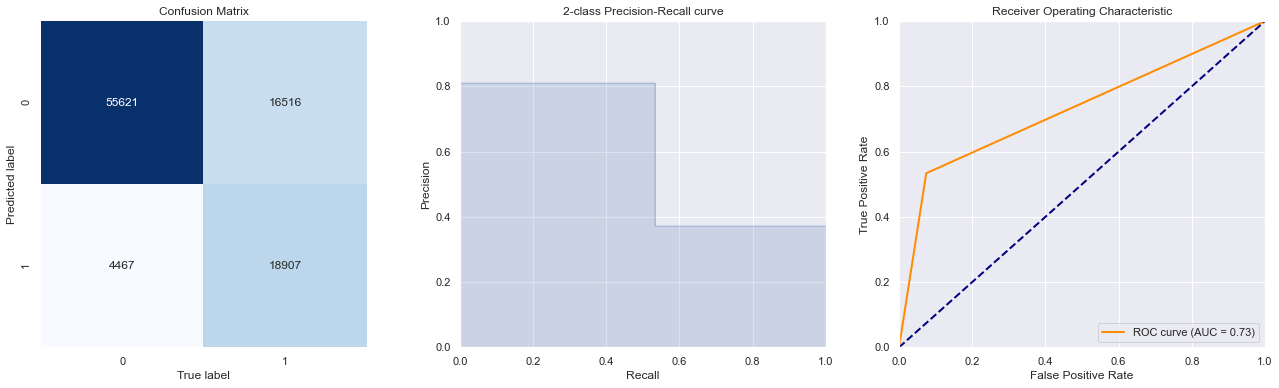

In [200]:
models = ['KNN Classifier with PCA','Decision tree with PCA']
for i, m in enumerate ([model_k,model_dt]):
    print('*' * (len(models[i]) + 5))
    print('* %s *' %models[i])
    print('*' * (len(models[i]) + 5))
    predictions = m.predict(X_train)
    
    #show report
    accuracy_, precision_, recall_, roc_auc_ = show_summary_report(y_train, predictions)
    
    results.loc[i] = {'Model':models[i],
                  'Accuracy':accuracy_, 
                  'Precision': precision_, 
                  'Recall': recall_, 
                  'ROC_AUC': roc_auc_}

In [201]:
results

,Model,Accuracy,Precision,Recall,ROC_AUC
0,KNN Classifier with PCA,0.747526,0.764984,0.460831,0.688685
1,Decision tree with PCA,0.780308,0.808890,0.533749,0.729704


# Evaluation of Model 3 and 4 Test Sets

## Model 3- KNN Classifier (PCA) X Test

In [202]:
predictions = model_k.predict(X_test)

Accuracy : 0.7265 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7138 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.4305 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.6649                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


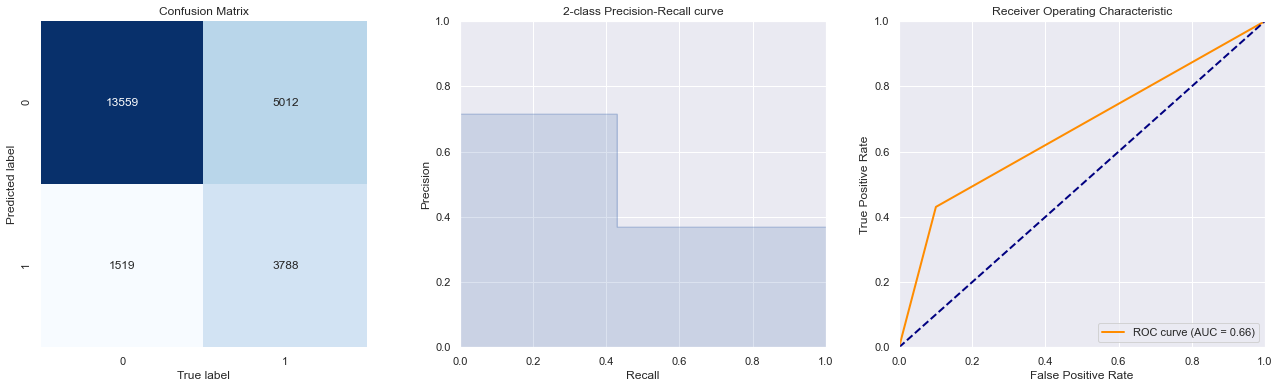

In [203]:
accuracy_, precision_, recall_, roc_auc_ = show_summary_report(y_test, predictions)

In [204]:
y_test.head()

8030     1
37532    0
76866    1
1960     0
98972    0
Name: is_canceled, dtype: int64

In [205]:
y_new = model_k.predict(X_test)
print("X=%s, Predicted=%s" % (X_test[0], y_new[0]))

X=[ 0.31349185 -0.68175138 -0.20538016 -1.3492128  -1.19535486], Predicted=1


# Model 4- Decision Tree (PCA) X Test

In [206]:
predictions = model_dt.predict(X_test)

Accuracy : 0.7459 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7339 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.4870 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.6920                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


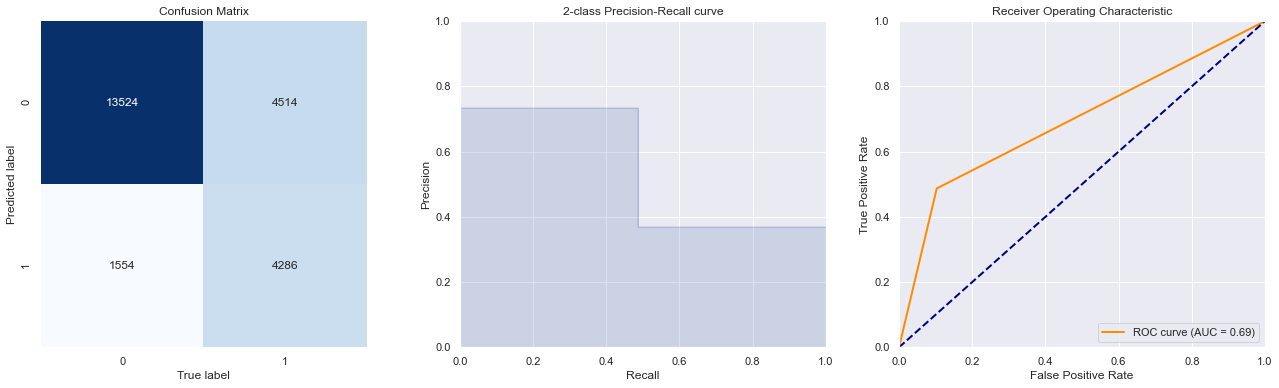

In [207]:
accuracy_, precision_, recall_, roc_auc_ = show_summary_report(y_test, predictions)

In [208]:
predictions[0]

1

In [209]:
y_test.head()

8030     1
37532    0
76866    1
1960     0
98972    0
Name: is_canceled, dtype: int64

In [210]:
y_new = model_dt.predict(X_test)
print("X=%s, Predicted=%s" % (X_test[0], y_new[0]))

X=[ 0.31349185 -0.68175138 -0.20538016 -1.3492128  -1.19535486], Predicted=1


# Summary and Conclusion

Did feature selection, idenifying features correlated to target variable help?

Which model performs the best? 

How can we improve the model? 

The plausible reason for  all these models to be performing poorly in predicting the cancellation rate is highly attributed to the lack of good data. The data in this project was not generisable. We shold work to gather more datasets of Hotel Bookings from more hotels to gather insightful data. Furthermore, when we test the algorithm on testing dataset, most of the models perform poorly (overfitting).

Overfitting happens when a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data. This means that the noise or random fluctuations in the training data is picked up and learned as concepts by the model. This is seen in decision tree and KNN models. We can try to minimise overfiiting by pruning a tree after it has learned in order to remove some of the detail it has picked up.

## References


https://analytx4t.com/predicting-travel-booking-cancellations-with-machine-learning/


https://www.kaggle.com/wirachleelakiatiwong/it-will-be-canceled-or-not-eda-and-modeling

https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

https://www.kaggle.com/rgoyalml/hotel-booking-demand-eda-ml

https://www.ritchieng.com/machine-learning-evaluate-classification-model/

https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python

(https://www.sciencedirect.com/science/article/pii/S2352340918315191)

https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/

https://medium.com/tech4she/investigating-factors-affecting-hotel-booking-cancelations-9ec9bf81b0a8

## 